# Processing temperature and precipitation data

The temperature and precipitation data in the Eastern Mediterranean region can be downloaded from the Eastern Mediterranean Climate website.<br/>
<a href="http://emcc.mgm.gov.tr/archive.aspx"><img alt="CSC badge" src="http://emcc.mgm.gov.tr/App_Themes/title_nnn1.gif" style="vertical-align:text-bottom"></a>

We will be generating simple temperature and precipitation plots for all stations in the Eastern Mediterranean region.

We are now working in a new notebook file and we need to import pandas again. 

In [1]:
import pandas as pd

Let's work with the data from the website and load it using the `pd.read_excel()` method. We need to import os to read the contents of the `MGM` directory and read all excel files. 

In [2]:
import os

filename = "MGM/"+os.listdir('MGM/')[0]
data = pd.read_excel(filename, usecols=['StationName', 'Year', 'Month', 'Temperature', 'Precipitation'])

for i in range(len(os.listdir('MGM/'))-1):
    filename = "MGM/"+os.listdir('MGM/')[i+1]
    data_add = pd.read_excel(filename, usecols=['StationName', 'Year', 'Month', 'Temperature', 'Precipitation'])
    frames = [data, data_add]
    data = pd.concat(frames)

We want to examine the dimensions of the data frame by `data.shape` and the head and tail of data using `data.head()` and `data.tail()`.

In [3]:
data.shape

(6279, 5)

In [4]:
data.head()

StationName    Year  Month  Temperature  Precipitation
0      BARTIN  2018.0    1.0          5.8           70.8
1   ZONGULDAK  2018.0    1.0          7.4           78.2
2       SİNOP  2018.0    1.0          7.4           52.0
3      SAMSUN  2018.0    1.0          8.8          134.7
4        ORDU  2018.0    1.0          8.4          178.2

In [5]:
data.tail()

StationName    Year  Month  Temperature  Precipitation
95       LARISSA (AIRPORT)  2023.0    2.0          7.4            3.0
96                 LARNAKA  2023.0    2.0         11.5           38.0
97                  MAFRAQ  2023.0    2.0          8.9           45.0
98         SOUDA (AIRPORT)  2023.0    2.0         10.8           70.0
99  THESSALONIKI (AIRPORT)  2023.0    2.0          8.2           13.0

We first reset the index so the row index numbers reflect the shape of the dataframe. Than we should check the data types of `Year` and `Month` columns as we see float variables.

In [6]:
# Reset index
data.reset_index(drop=True)

# Check the numbe of rows and columns of dataframe
data.shape

(6279, 5)

In [7]:
# Check the type of dataframe
type(data)


pandas.core.frame.DataFrame

As this doesn't give information about the types of dataframe columns, we check the column types using `data.dtypes`.

In [8]:
data.dtypes

StationName       object
Year             float64
Month            float64
Temperature      float64
Precipitation    float64
dtype: object

We should change the data types of Year and Month with integer values. Before doing this, we should also make sure to remove the not available data.

In [9]:
# Fill in the not available data with 0
data = data.fillna(0)

# Change the type of "Year" and "Month" columns from float to integer in the dataframe
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)

### Station list

We will be plotting the temperature and precipitation data for all stations. We have to generate the list of all stations and remove the duplications. We import numpy using `import numpy as np` and list the unique station names using `np.unique`.

```
# Import numpy
import numpy as np

# List the station names
data_stations_list = np.unique(data["StationName"].tolist())

# Print the station names
for station in np.unique(data_stations_list):
    print(station)
``` 

In [10]:
import numpy as np

data_stations_list = np.unique(data["StationName"].tolist())

print(data_stations_list)


['0' 'ADANA' 'ADIYAMAN' 'AFYONKARAHİSAR' 'AKSARAY' 'AMASYA' 'ANKARA'
 'ANTAKYA' 'ANTALYA' 'ANTALYA ' 'ARDAHAN' 'ARTVİN' 'ASSWAN'
 'ATHINAI AP HELLINIKON' 'AYDIN' 'Asswan' 'AĞRI' 'BAHARIA' 'BALIKESİR'
 'BALIKESİR HAVALİMANI' 'BARTIN' 'BATMAN' 'BAYBURT' 'BEER SHEVA CITY'
 'BEN-GURION INT. AIRPORT' 'BET DAGAN' 'BET DAGAN. AIRPORT' 'BET Dagan'
 'BET-DAGAN' 'BET-DEGAN' 'BOLU' 'BURDUR' 'BURSA' 'Baharia'
 'Ben Gurion Int. Airport' 'BİLECİK' 'BİNGÖL' 'BİTLİS' 'DAHAB' 'DENİZLİ'
 'Dahab' 'DÜZCE' 'DİYARBAKIR' 'EDİRNE' 'EILAT' 'EILAT\xa0' 'EL ARISH'
 'ELAZIĞ' 'ERZURUM' 'ERZİNCAN' 'ESKİŞEHİR' 'Eilat' 'FARAFRA' 'FARFARA'
 'FLORYA' 'GAZİANTEP' 'GHOR SAFI' 'Ghor safi' 'GÜMÜŞHANE' 'GİRESUN'
 'H-4 RWASHED' 'H4-RWASHED' 'HAKKARİ' 'HAR-KNAAN' 'HELWAN' 'HELWAN\xa0'
 'HERAKLION (AIRPORT)' 'HURGUADA' 'Helwan' 'Hurguada' 'ISPARTA' 'IĞDIR'
 'KAHRAMANMARAŞ' 'KALAMATA' 'KALAMATA (AIRPORT)' 'KARABUK' 'KARABÜK'
 'KARAMAN' 'KARS' 'KASTAMONU' 'KAYSERİ' 'KERKYRA' 'KERKYRA (AIRPORT)'
 'KHARGA' 'KHARGA AGRIMET' 'KIRIKK

In [12]:
# Check the unfamiliar station names
print(data.loc[data['StationName'] == 'S. Valley University'])


             StationName  Year  Month  Temperature  Precipitation
86  S. Valley University  2022      9         33.0            0.0
87  S. Valley University  2022     10         28.0            0.0


We first have the station name `0` which we want to remove the rows from dataframe with `data = data.loc[data["StationName"] != 0]`. We also have some whitespaces in the numpy array which results in the duplication of some stations such as  `ANTALYA` in the dataframe. Lower and upper cases letters are also considered different and should be combined.

In [21]:
# Delete the rows for station 0
# data_stations_list = np.delete(data_stations_list,0)
data = data.loc[data["StationName"] != 0]

# Change all lower case station names to upper case
data['StationName'] = data['StationName'].apply(str.upper)

# Combine rows with same station names
data['StationName'] = data['StationName'].replace('ANTALYA ', 'ANTALYA')
data['StationName'] = data['StationName'].replace(['BET Dagan','BET-DAGAN','BET-DEGAN'], 'BET DAGAN')
data['StationName'] = data['StationName'].replace('EILAT\xa0','EILAT')
data['StationName'] = data['StationName'].replace('FARFARA', 'FARAFRA')
data['StationName'] = data['StationName'].replace(['H-4 RWASHED','H4-RWASHED','RWASHED'], 'RUWAISHED')
data['StationName'] = data['StationName'].replace('KARABUK', 'KARABÜK')
data['StationName'] = data['StationName'].replace('LARNACA AIRPORT', 'LARNACA (AIRPORT)')
data['StationName'] = data['StationName'].replace('LARNAKA', 'LARNACA')
data['StationName'] = data['StationName'].replace('MAAN', "MA'AN")
data['StationName'] = data['StationName'].replace(['MERSA MATROUH', 'MERSA-MATRUH'], 'MERSA MATRUH')
data['StationName'] = data['StationName'].replace(['MINYA', 'MİNYA'], 'MINYE')
data['StationName'] = data['StationName'].replace(['SHALATIN\xa0', 'SHALATİN'], 'SHALATIN')
data['StationName'] = data['StationName'].replace('ZAKHINTOS', 'ZAKINTHOS')
data['StationName'] = data['StationName'].replace('BEN-GURION INT. AIRPORT', 'BEN GURION INT. AIRPORT')
data['StationName'] = data['StationName'].replace('MERSA', 'MERSA MATRUH')

# Remove the non-escape blank character from 'HELWAN' station
data['StationName'] = data['StationName'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [22]:
# Check if the station names are corrected
data_stations_list = np.unique(data["StationName"].tolist())

print(data_stations_list)

['ADANA' 'ADIYAMAN' 'AFYONKARAHİSAR' 'AKSARAY' 'AMASYA' 'ANKARA' 'ANTAKYA'
 'ANTALYA' 'ARDAHAN' 'ARTVİN' 'ASSWAN' 'ATHINAI AP HELLINIKON' 'AYDIN'
 'AĞRI' 'BAHARIA' 'BALIKESİR' 'BALIKESİR HAVALİMANI' 'BARTIN' 'BATMAN'
 'BAYBURT' 'BEER SHEVA CITY' 'BEN GURION INT. AIRPORT' 'BET DAGAN'
 'BET DAGAN. AIRPORT' 'BOLU' 'BURDUR' 'BURSA' 'BİLECİK' 'BİNGÖL' 'BİTLİS'
 'DAHAB' 'DENİZLİ' 'DÜZCE' 'DİYARBAKIR' 'EDİRNE' 'EILAT' 'EL ARISH'
 'ELAZIĞ' 'ERZURUM' 'ERZİNCAN' 'ESKİŞEHİR' 'FARAFRA' 'FLORYA' 'GAZİANTEP'
 'GHOR SAFI' 'GÜMÜŞHANE' 'GİRESUN' 'HAKKARİ' 'HAR-KNAAN' 'HELWAN'
 'HERAKLION (AIRPORT)' 'HURGUADA' 'ISPARTA' 'IĞDIR' 'KAHRAMANMARAŞ'
 'KALAMATA' 'KALAMATA (AIRPORT)' 'KARABÜK' 'KARAMAN' 'KARS' 'KASTAMONU'
 'KAYSERİ' 'KERKYRA' 'KERKYRA (AIRPORT)' 'KHARGA' 'KHARGA AGRIMET'
 'KIRIKKALE' 'KIRKLARELİ' 'KIRŞEHİR' 'KOCAELİ' 'KONYA' 'KÜTAHYA' 'KİLİS'
 'LARISSA (AIRPORT)' 'LARNACA' 'LARNACA (AIRPORT)' "MA'AN" 'MAFRAQ'
 'MALATYA' 'MANİSA' 'MARDİN' 'MERSA MATRUH' 'MERSİN' 'MINYE' 'MUĞLA' 'MUŞ'
 'NEVŞEHİR'

### Statistics

We first group the temperature values for station names and months in the series `temp_mean`. The statistical distribution of temperature values are represented by the first, second and third quantiles stored in the series `temp_quantiles`.

In [40]:
# Store the temperature mean values
temp_mean = data.groupby(["StationName","Month"])["Temperature"].mean()

# Store the temperature quantile values
temp_quantile_first = data.groupby(["StationName","Month"])["Temperature"].quantile(0.25)
temp_quantile_second = data.groupby(["StationName","Month"])["Temperature"].quantile(0.50)
temp_quantile_third = data.groupby(["StationName","Month"])["Temperature"].quantile(0.75)

Check the temperature values by looking at the `head` and `tail` values.

In [41]:
temp_mean.head()

StationName  Month
ADANA        1        10.55
             2        11.66
             3        14.14
             4        18.74
             5        23.68
Name: Temperature, dtype: float64

In [42]:
temp_quantile_first.head()

StationName  Month
ADANA        1         9.825
             2        10.400
             3        13.900
             4        18.300
             5        23.300
Name: Temperature, dtype: float64

In [44]:
temp_quantile_second.head()

StationName  Month
ADANA        1        10.2
             2        11.8
             3        13.9
             4        18.3
             5        23.9
Name: Temperature, dtype: float64

In [45]:
temp_quantile_third.head()

StationName  Month
ADANA        1        11.4
             2        12.5
             3        15.3
             4        20.0
             5        24.1
Name: Temperature, dtype: float64

### Temperature plot
We will plot temperature mean and quantiles for stations with respect to monthly average values. We import pyplot from matplotlib using `import matplotlib.pyplot as plt`. 

C:\Users\ggungor\AppData\Local\Temp\ipykernel_14404\487303953.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


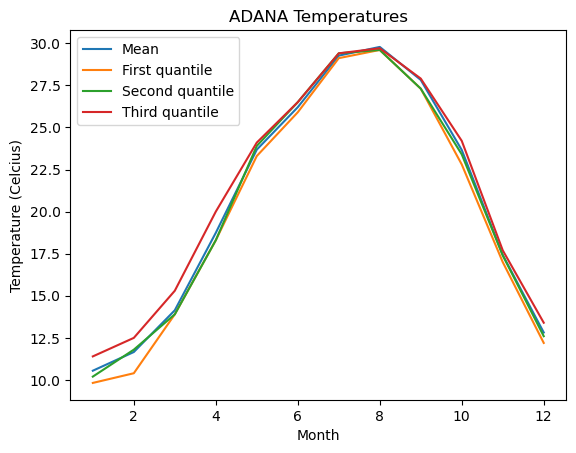

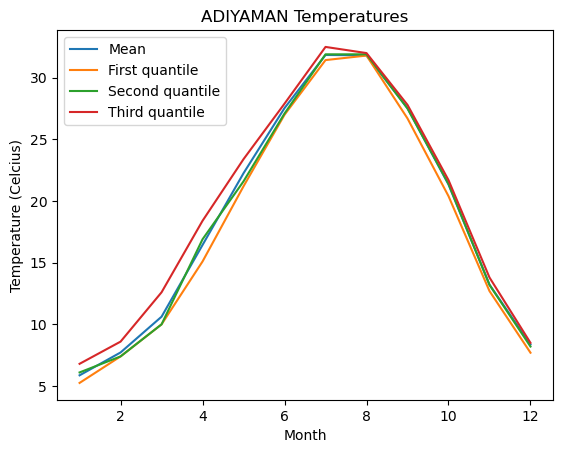

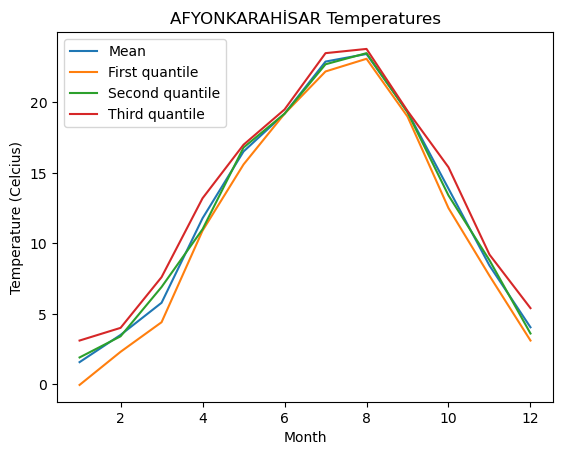

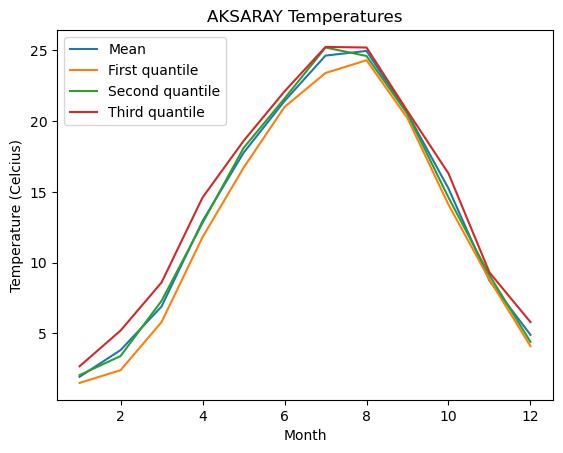

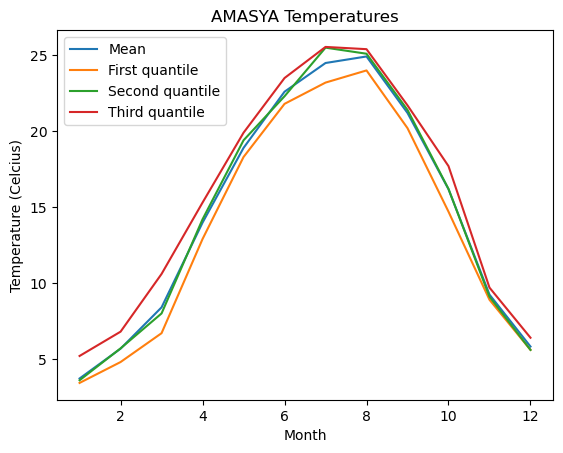

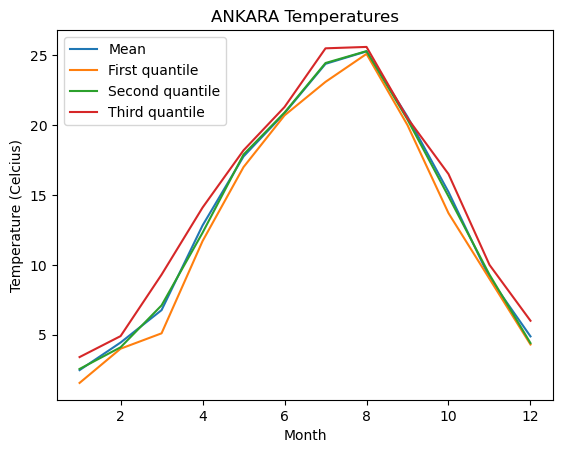

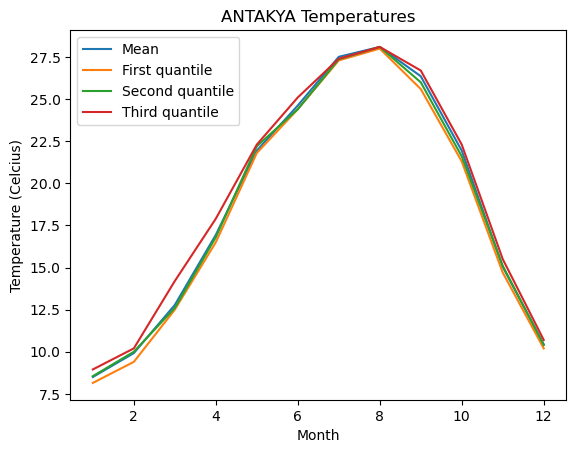

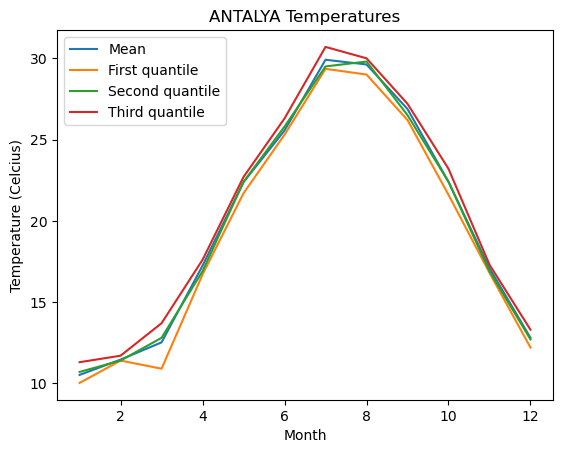

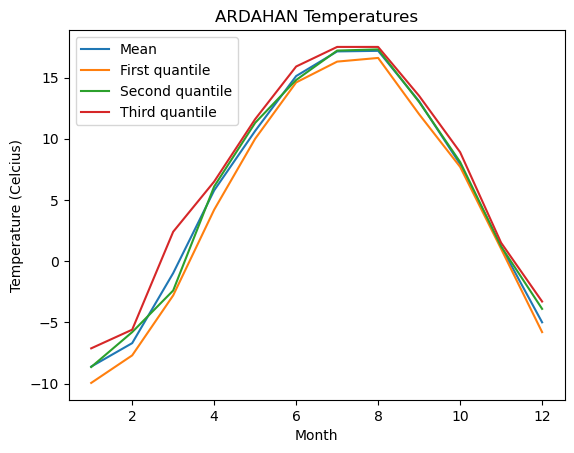

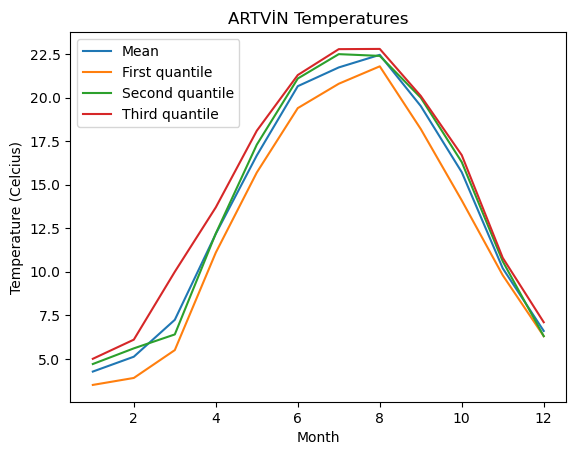

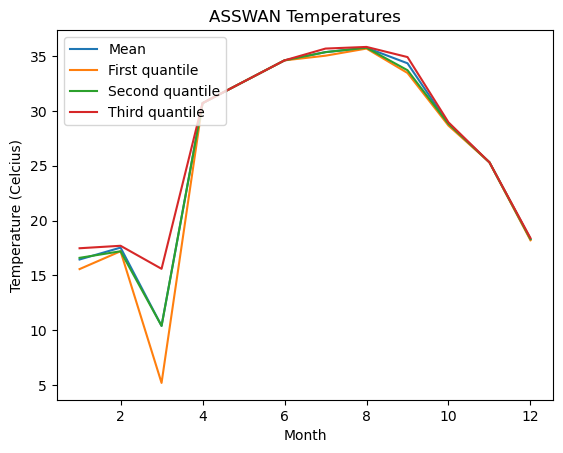

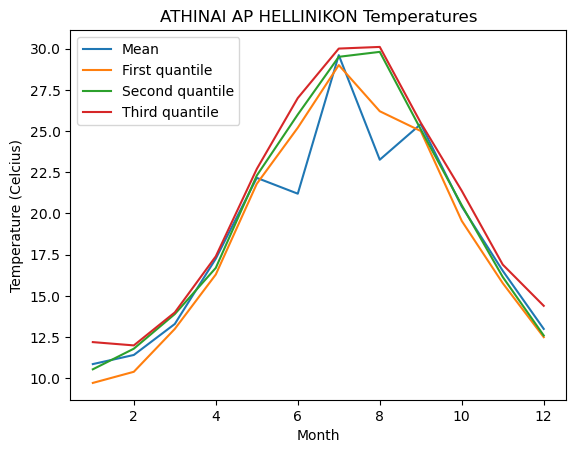

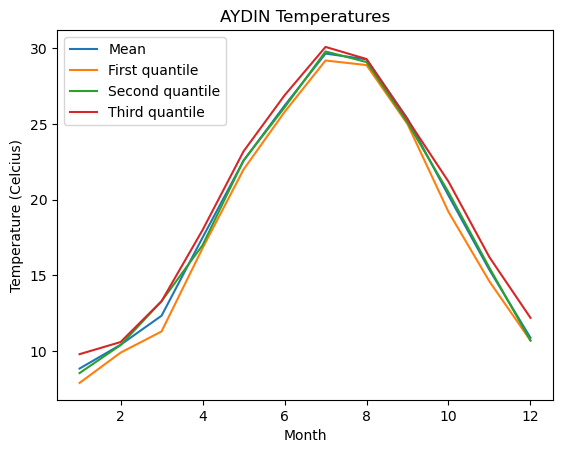

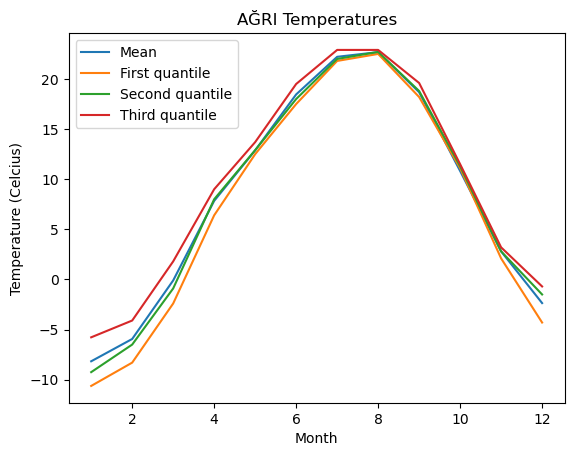

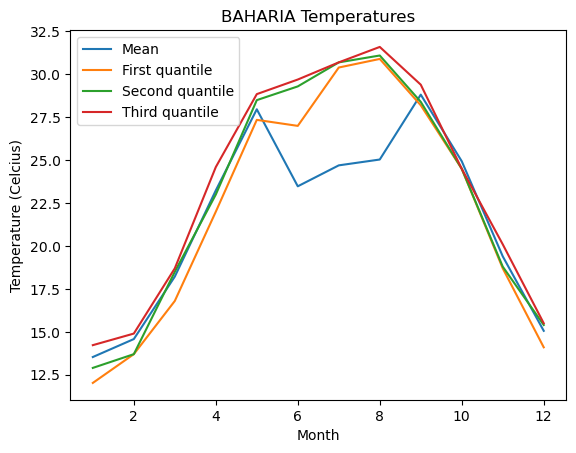

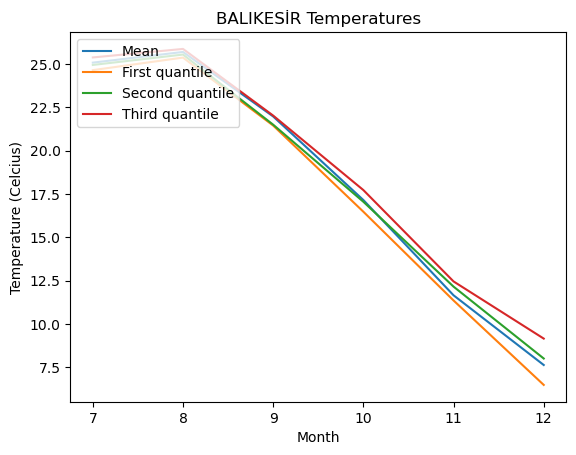

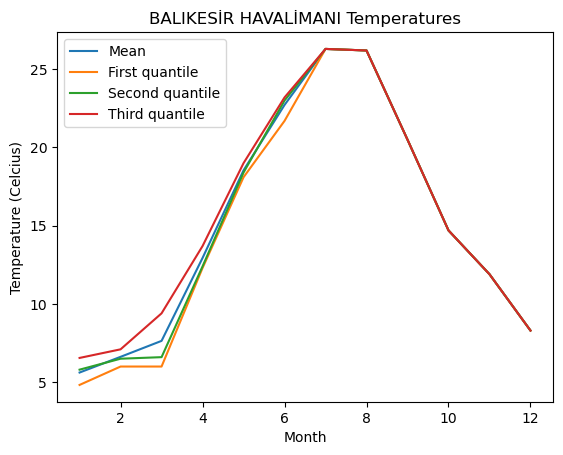

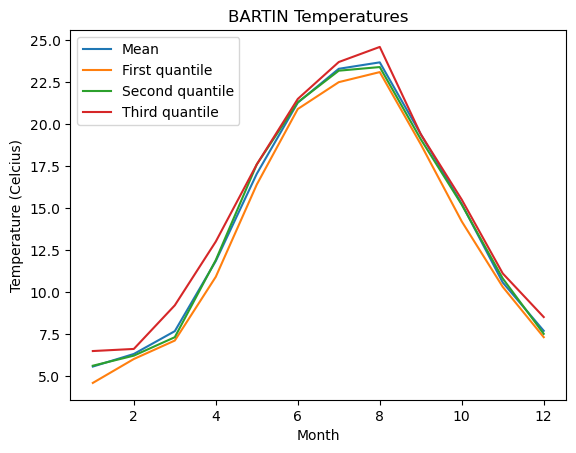

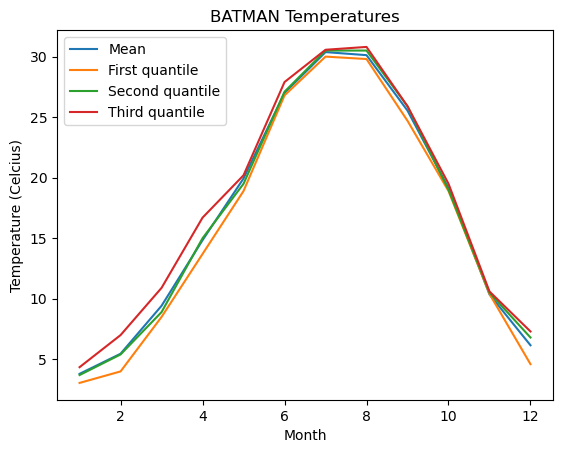

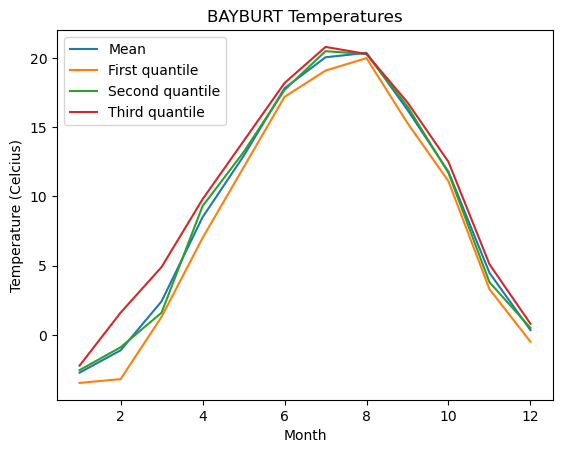

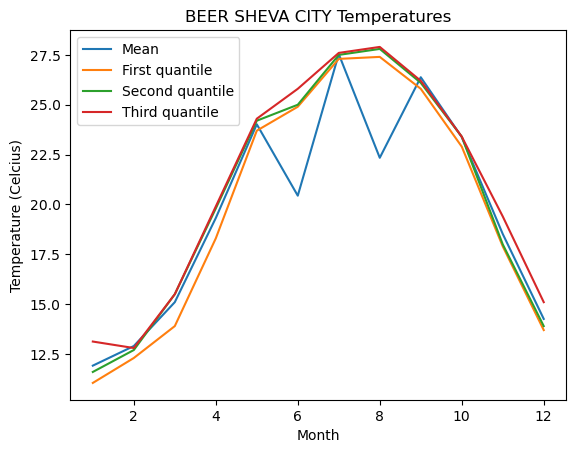

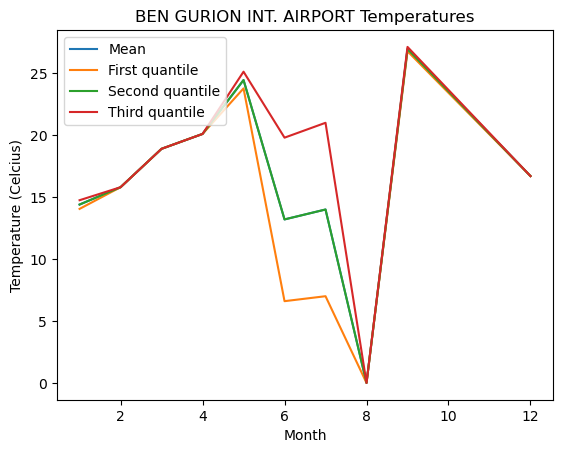

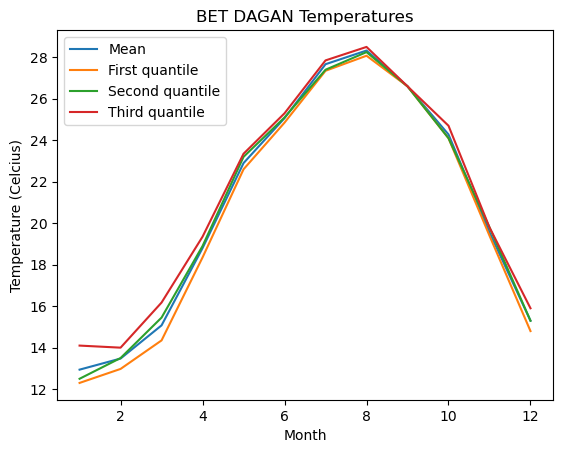

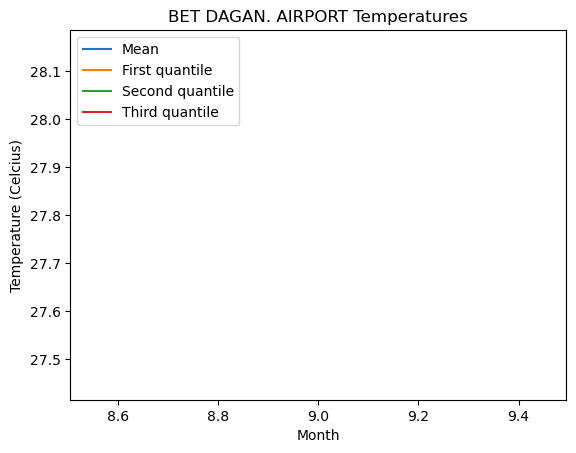

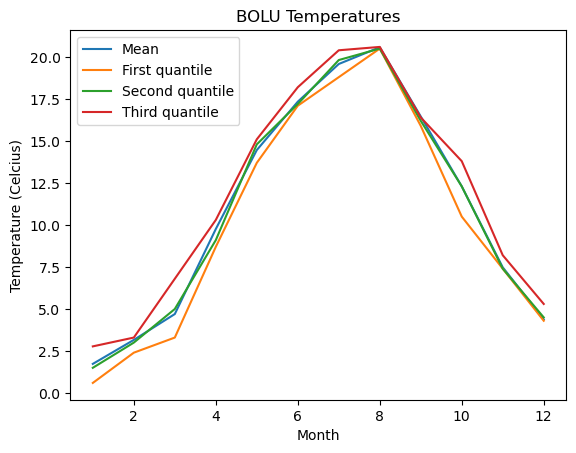

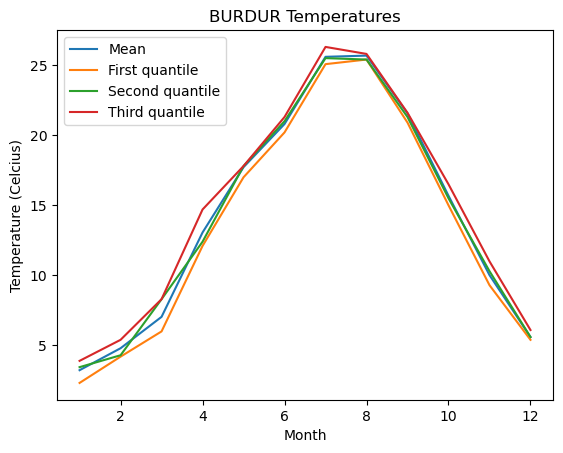

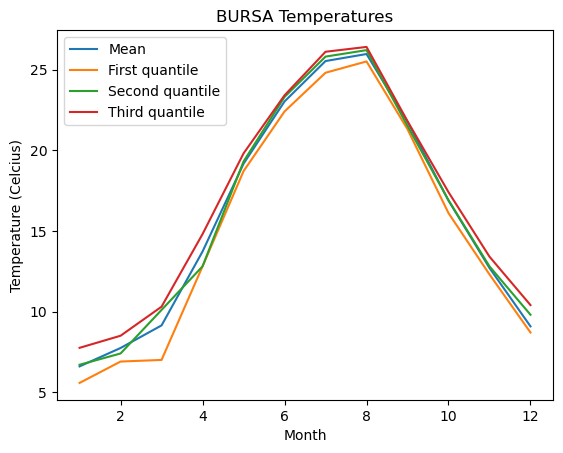

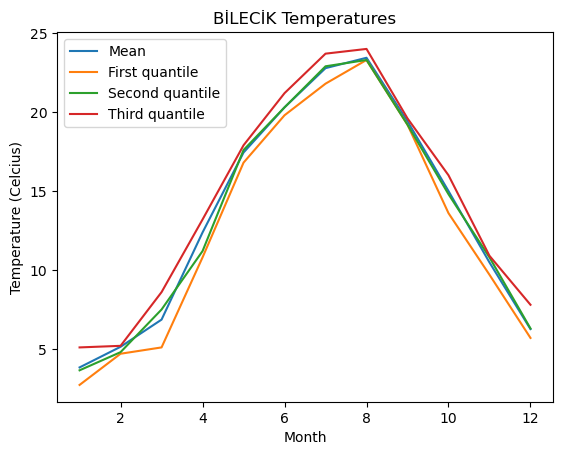

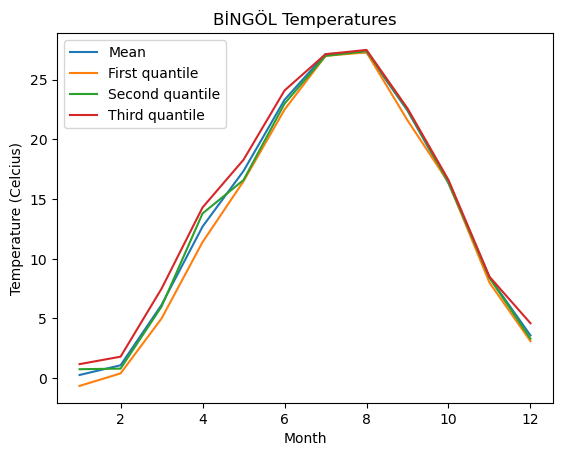

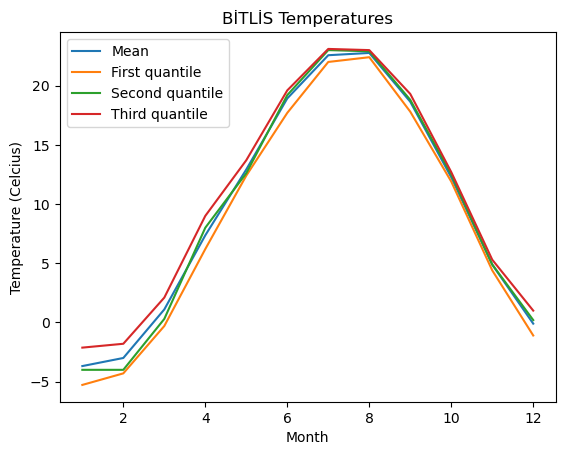

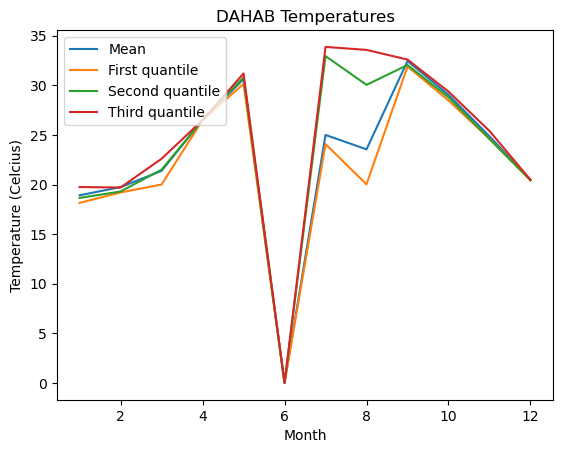

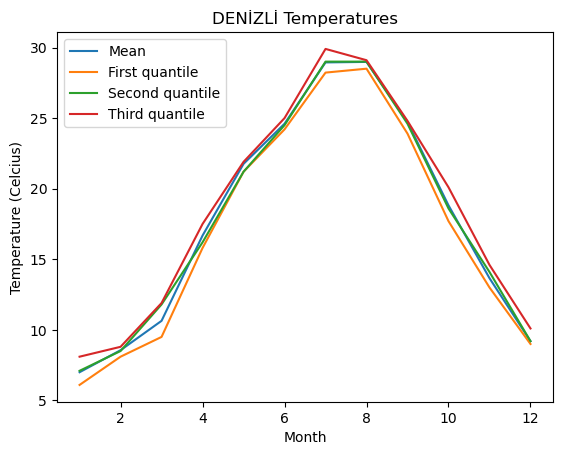

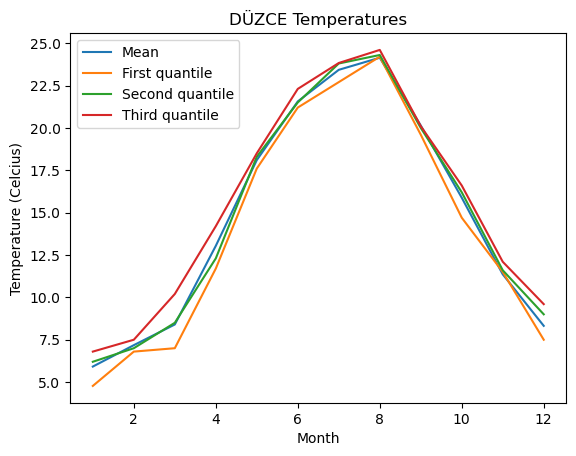

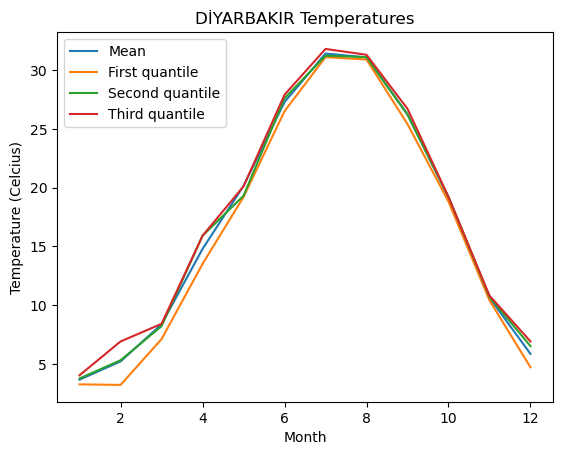

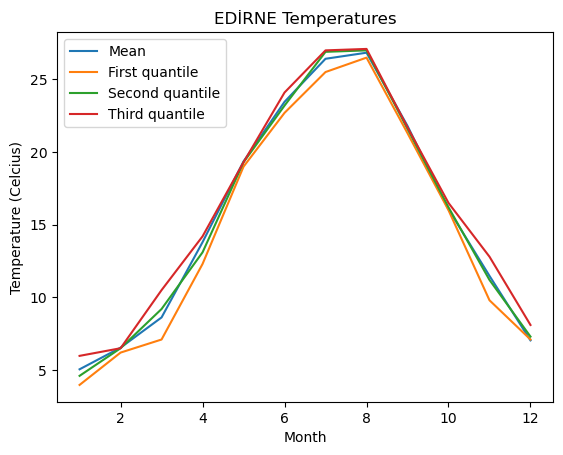

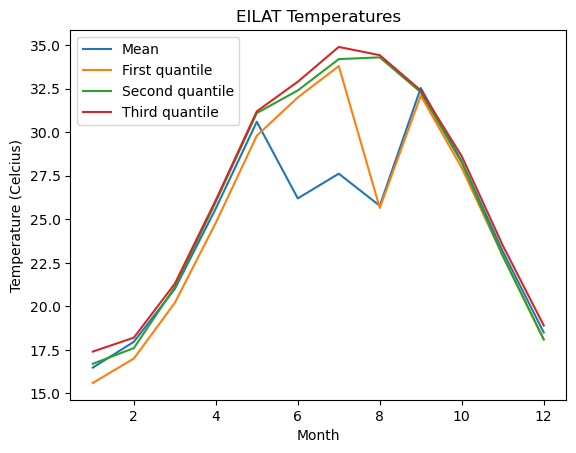

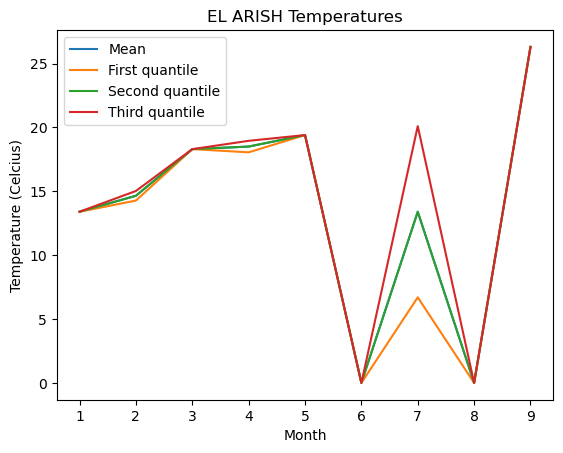

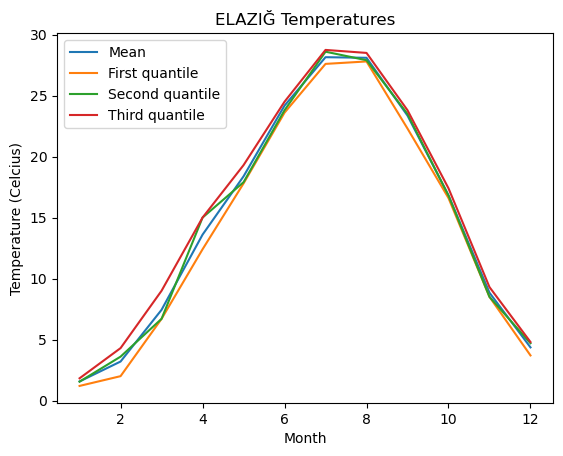

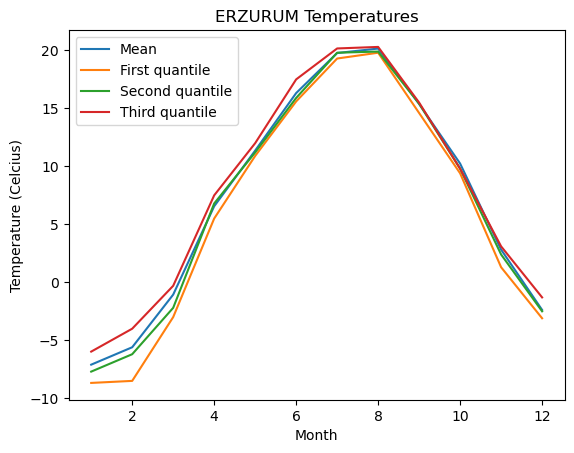

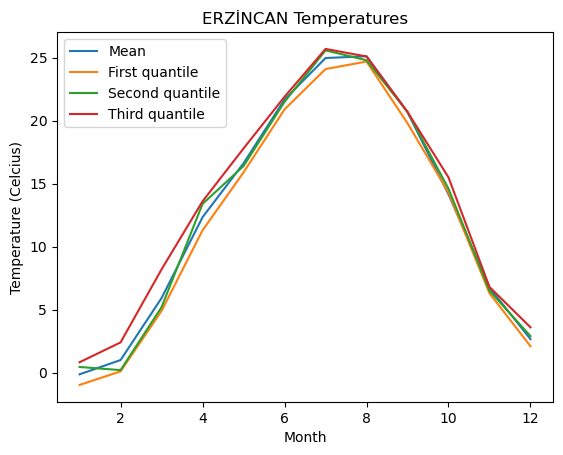

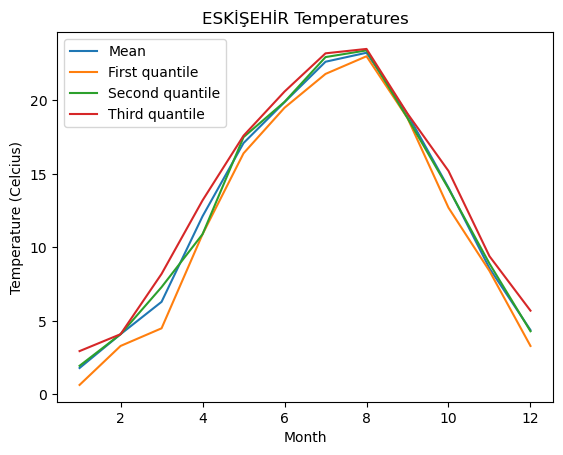

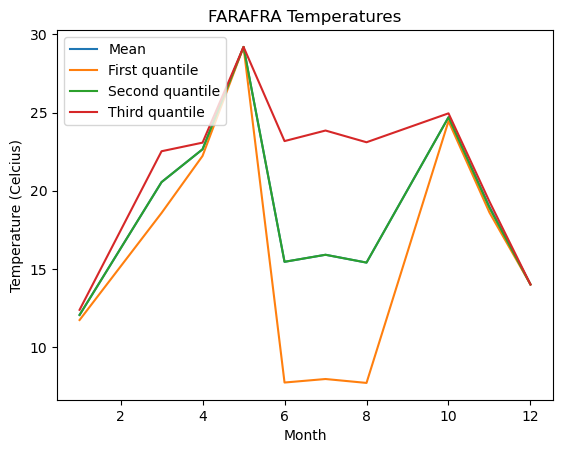

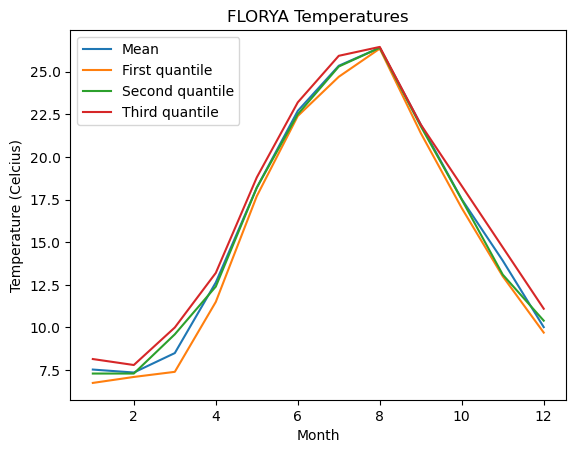

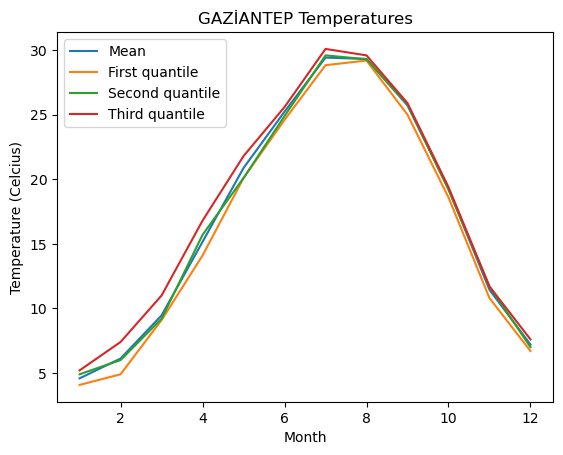

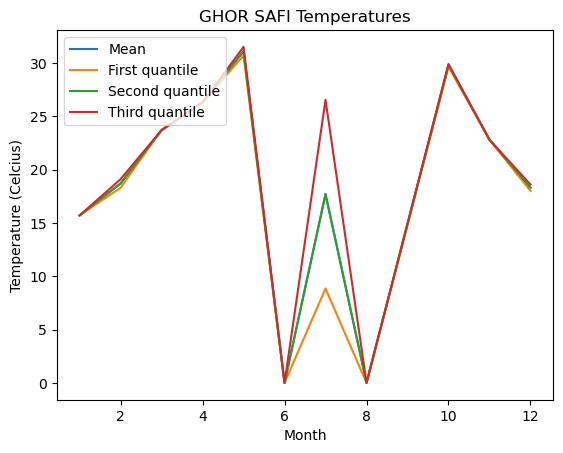

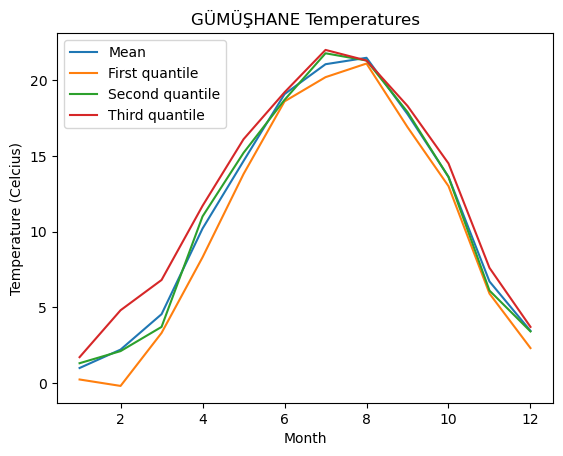

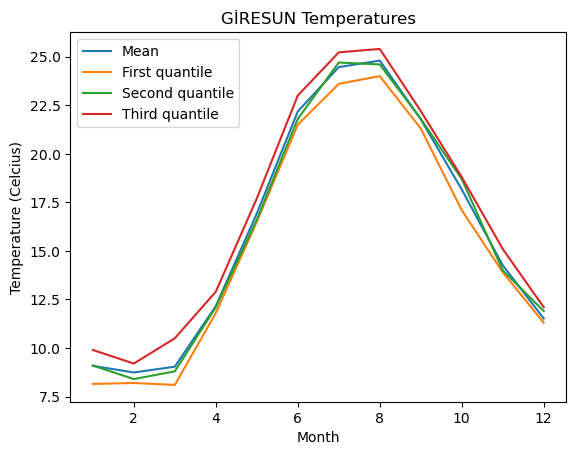

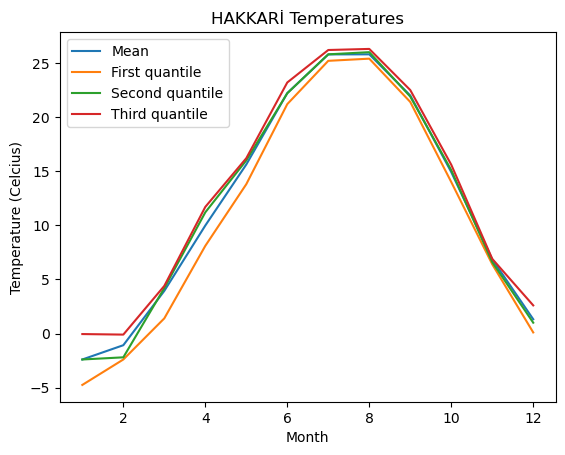

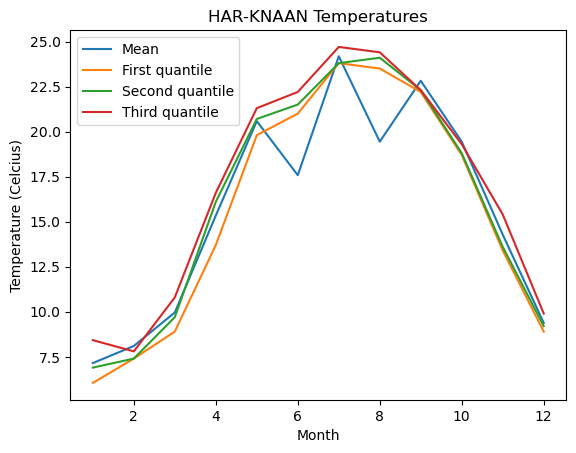

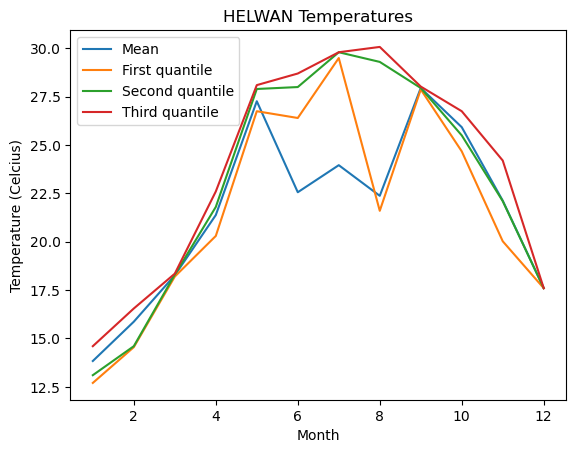

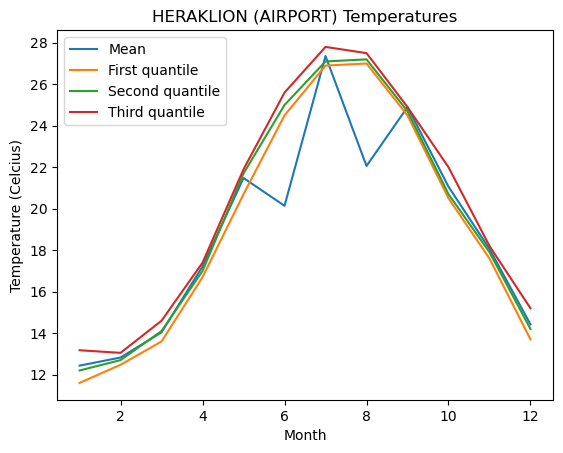

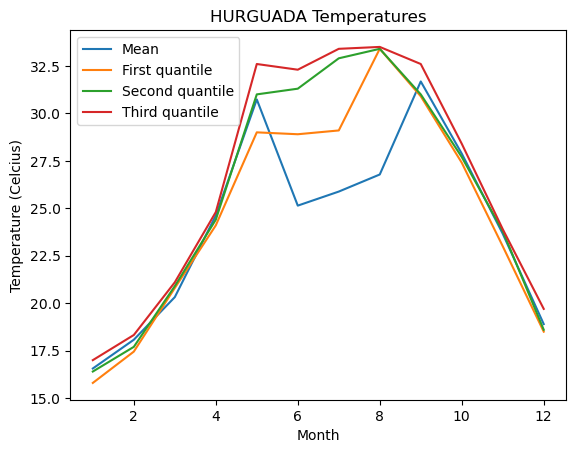

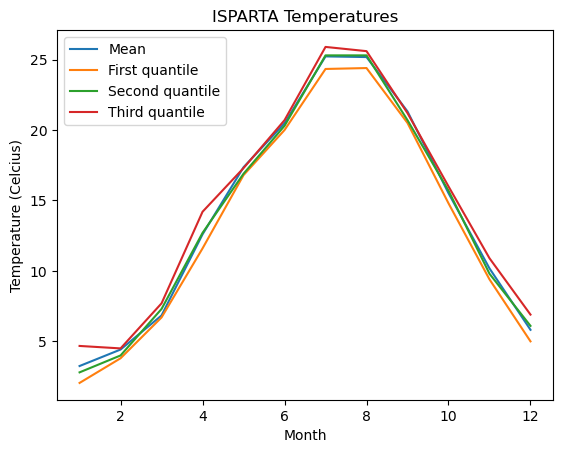

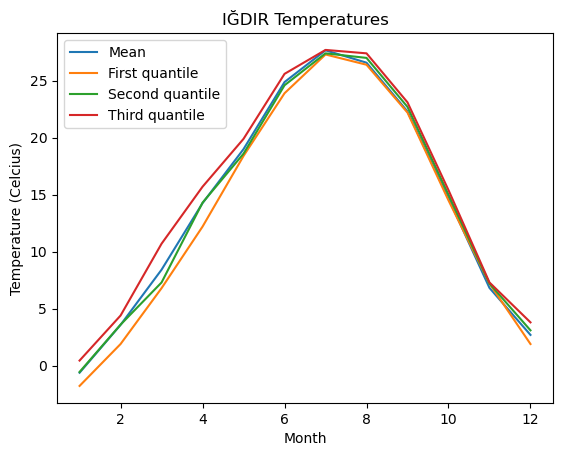

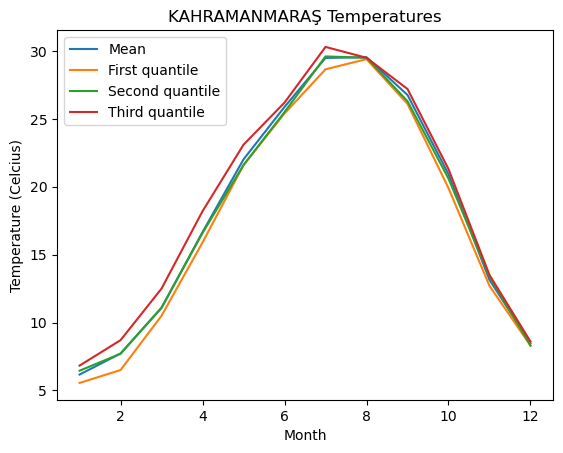

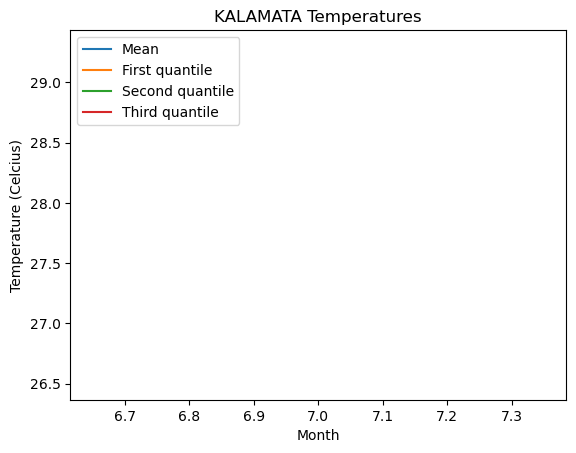

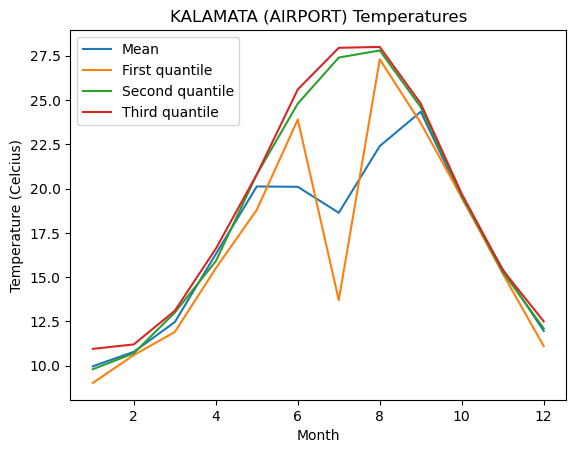

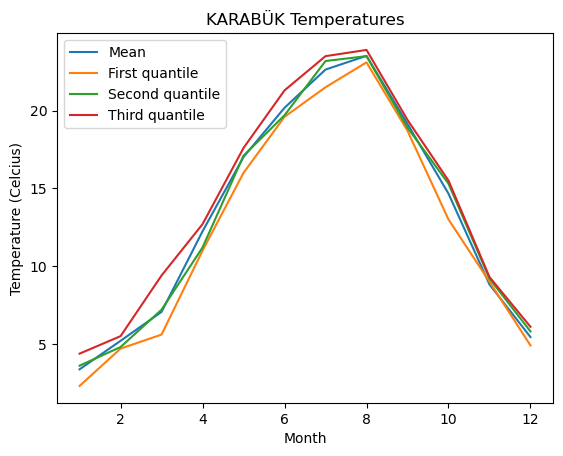

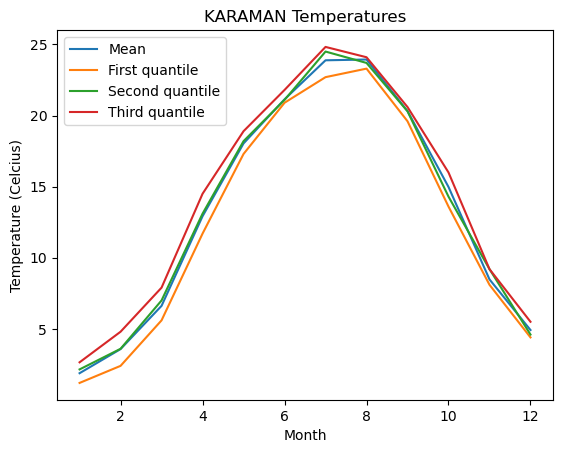

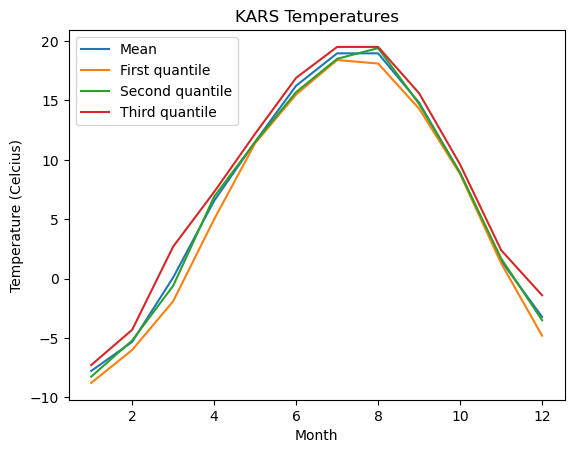

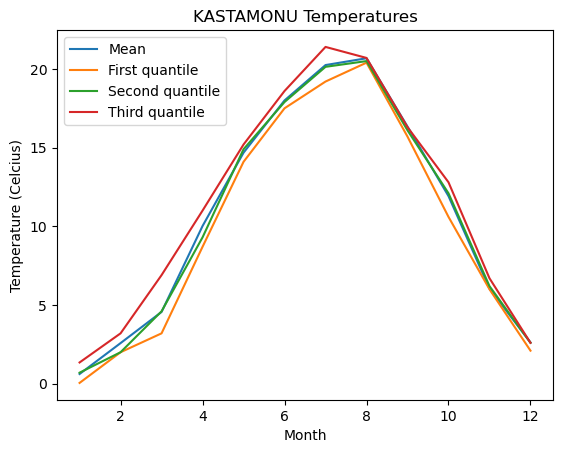

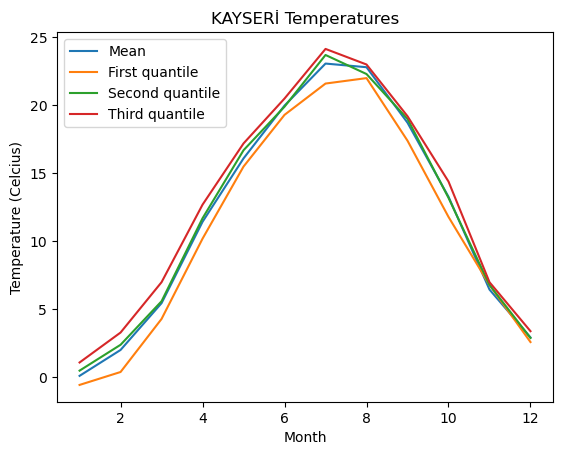

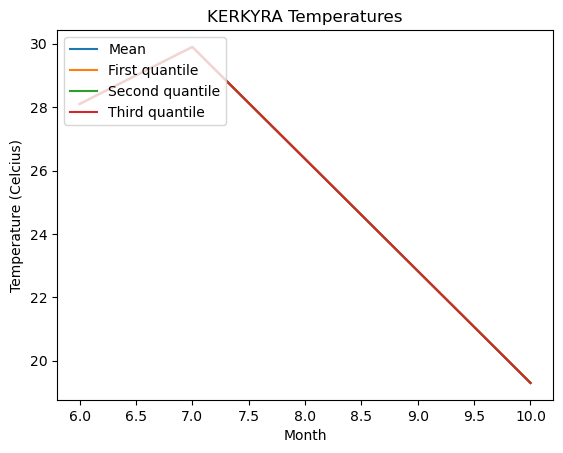

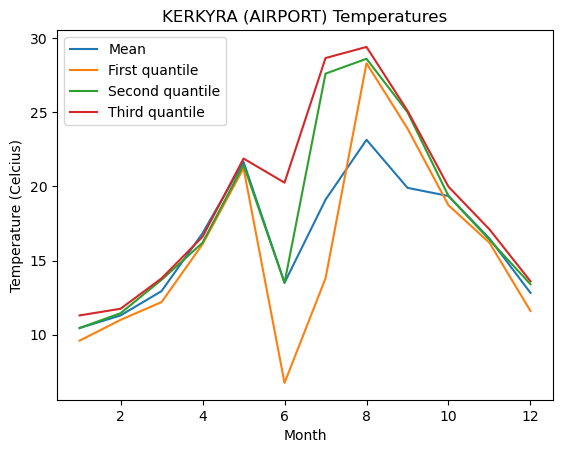

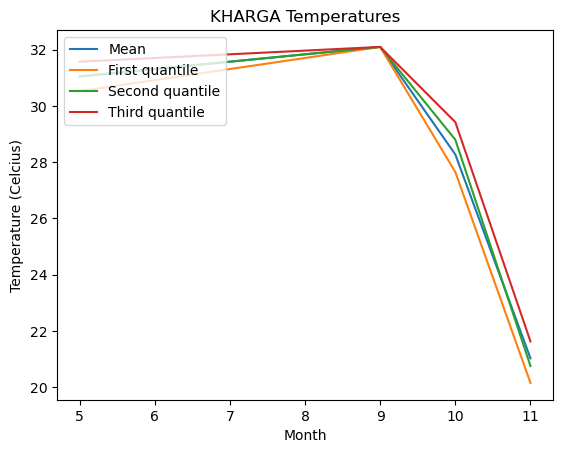

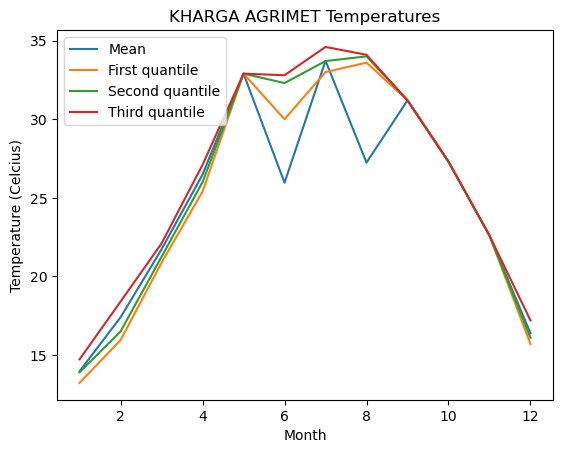

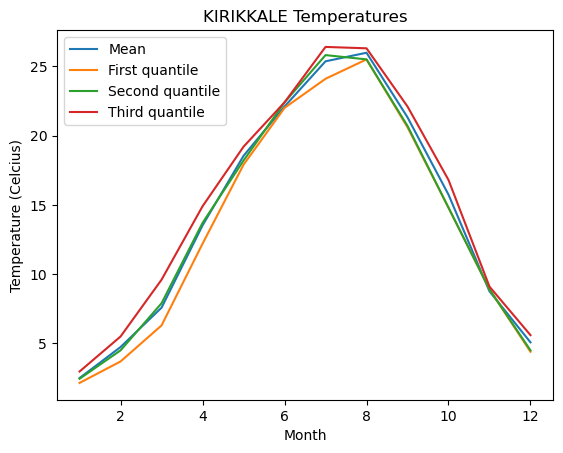

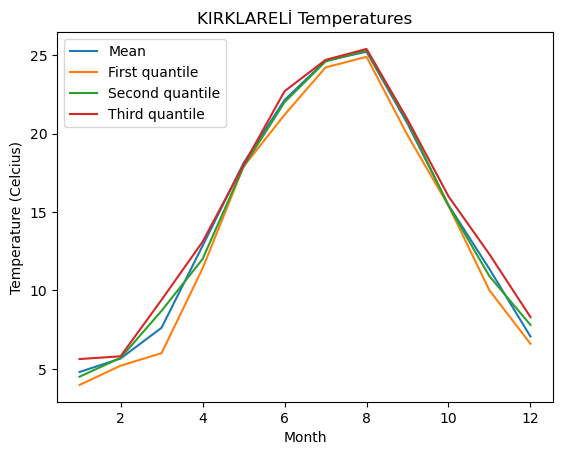

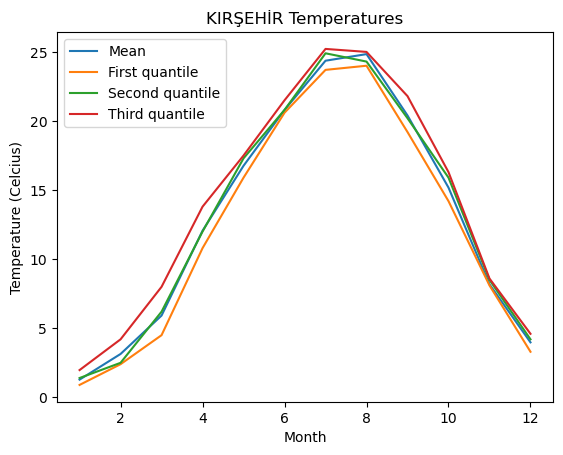

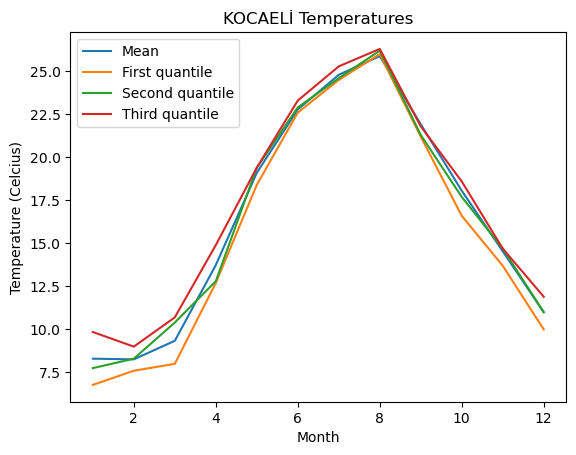

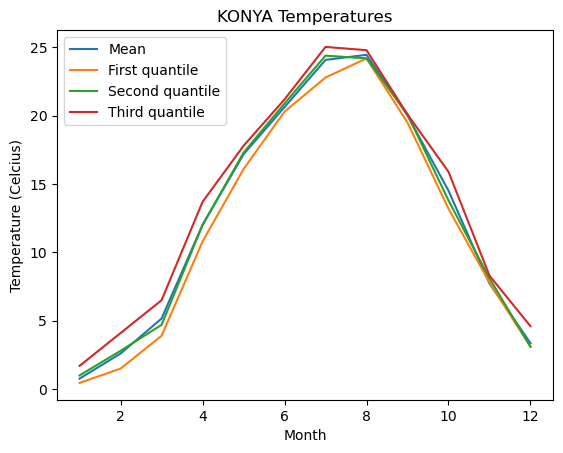

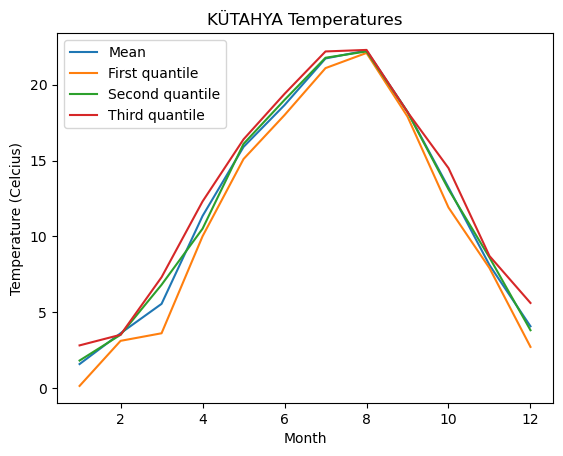

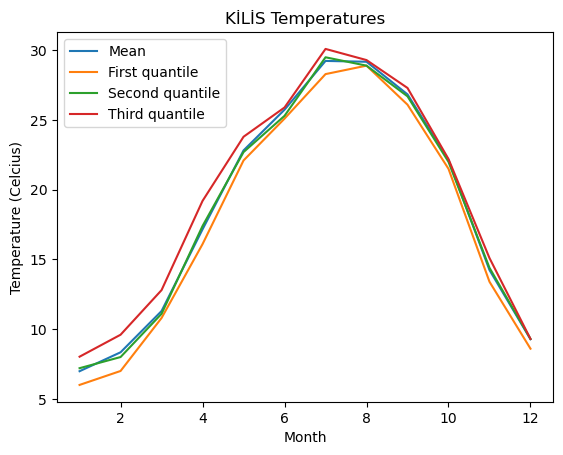

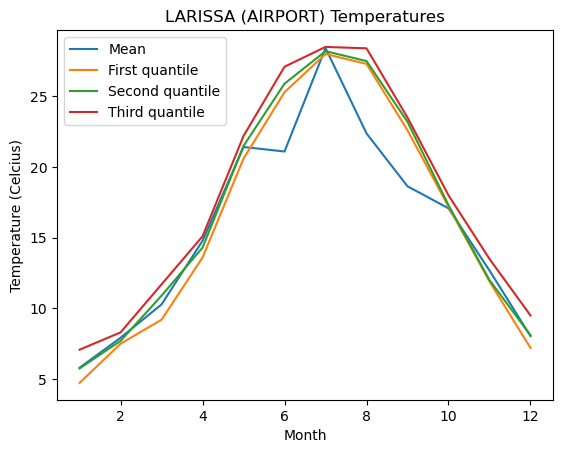

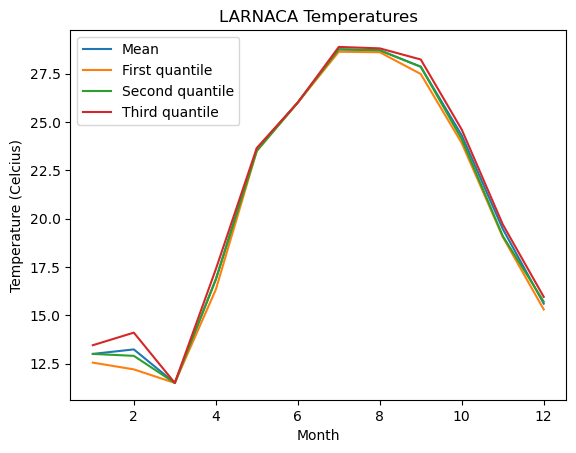

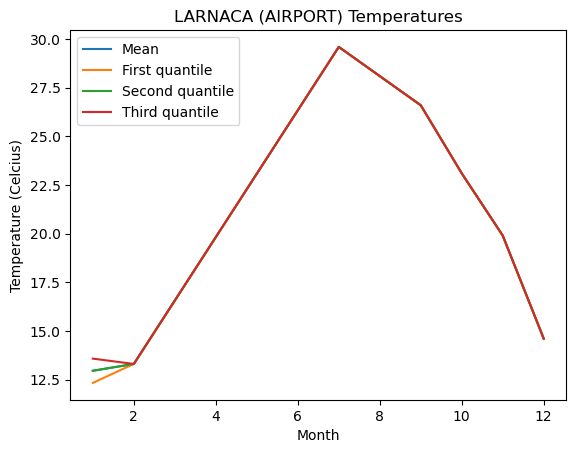

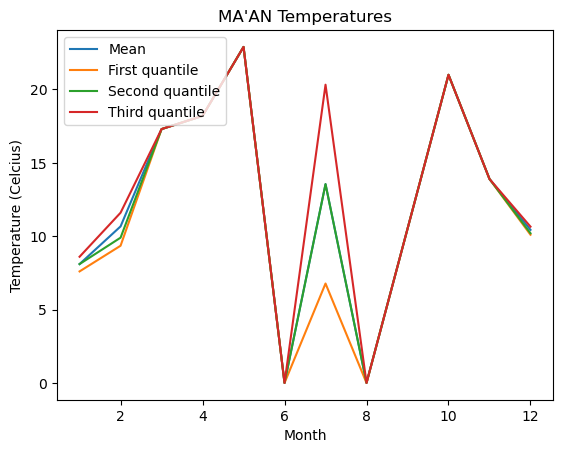

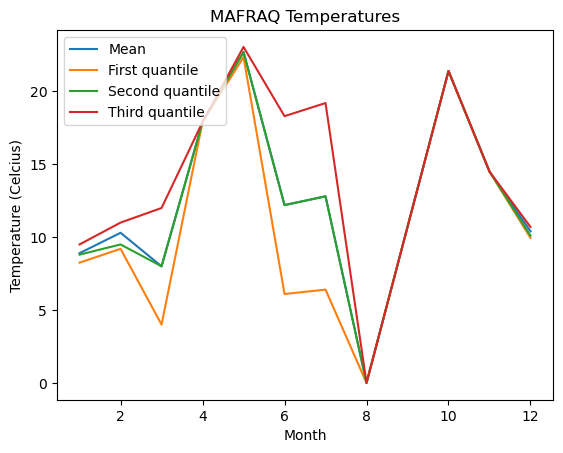

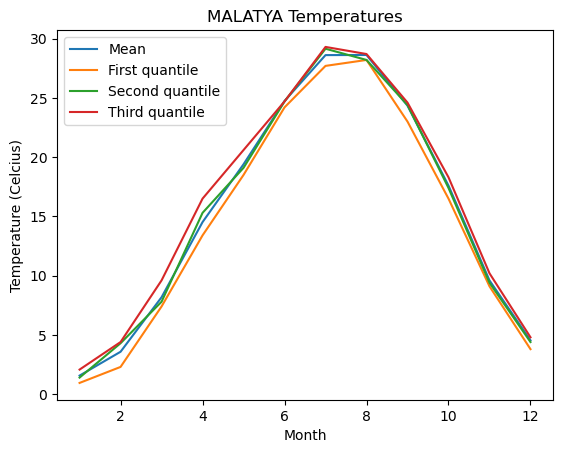

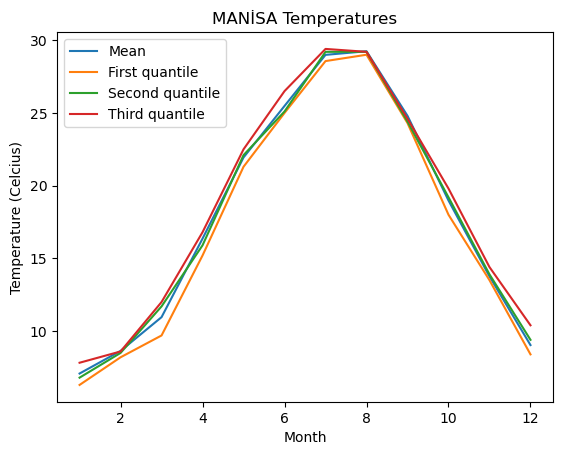

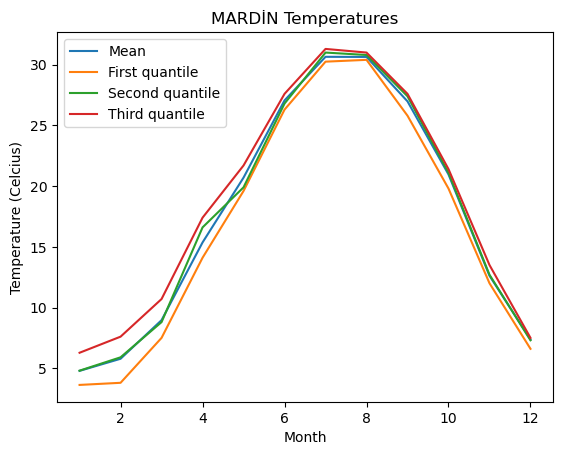

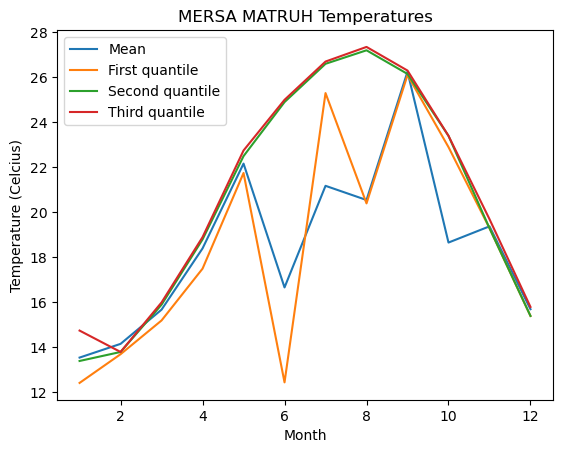

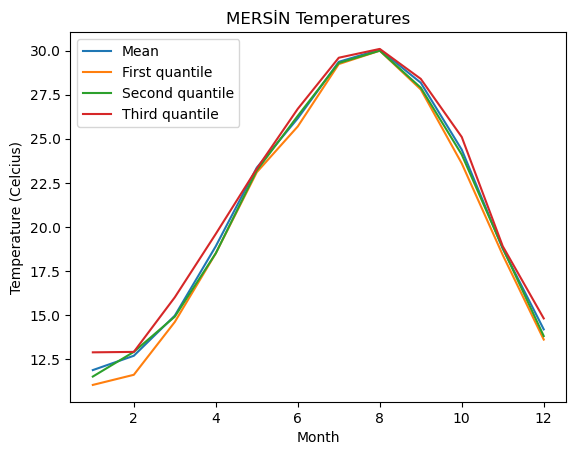

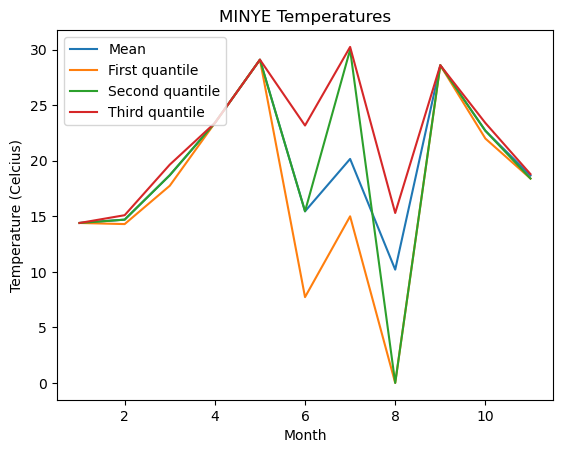

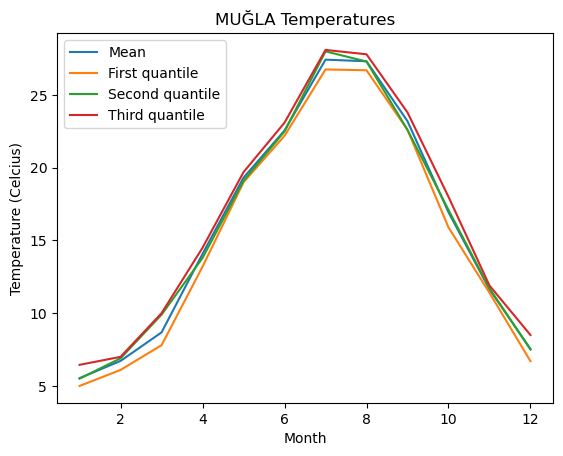

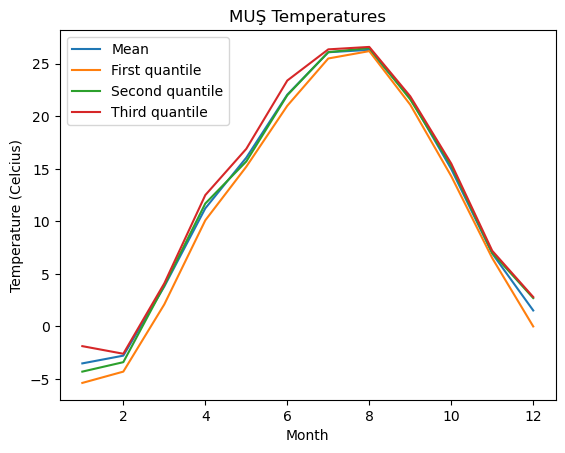

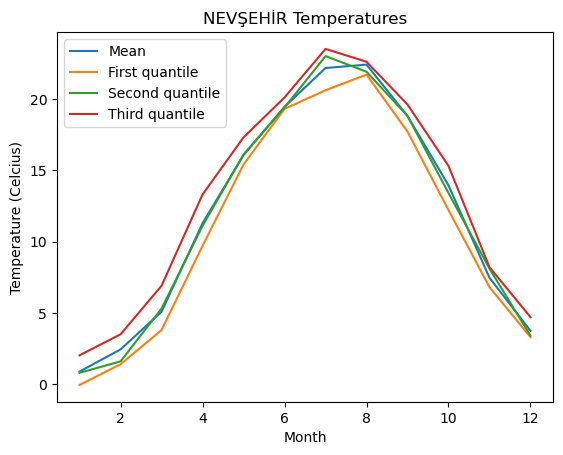

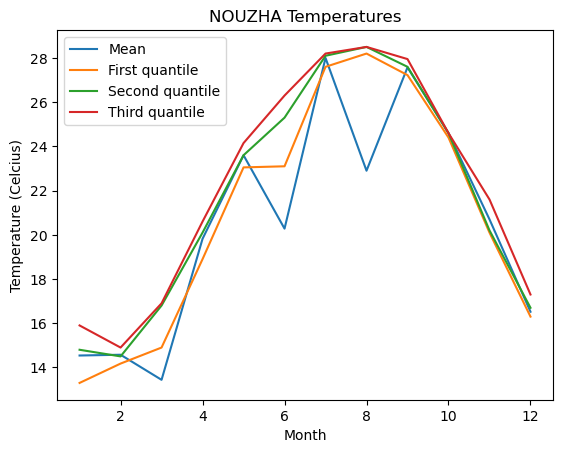

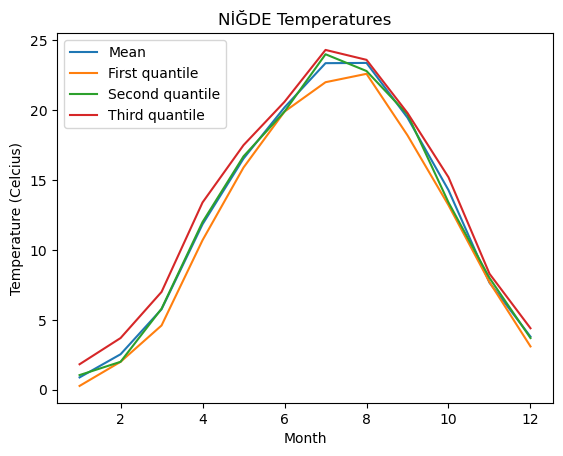

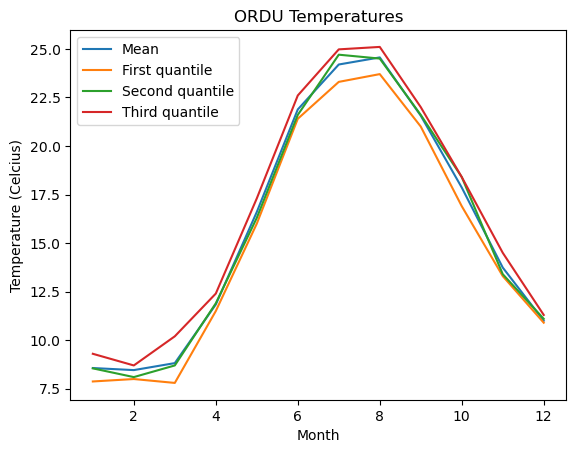

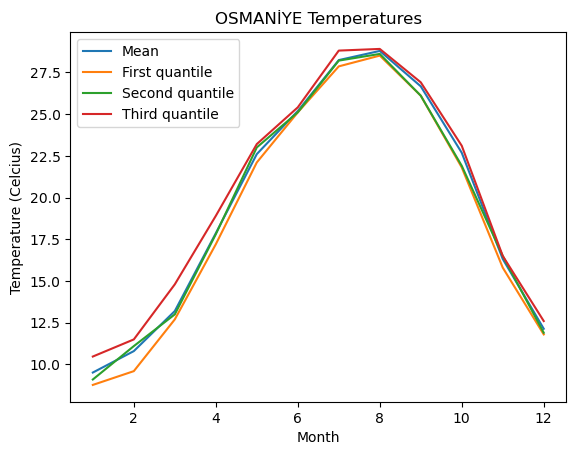

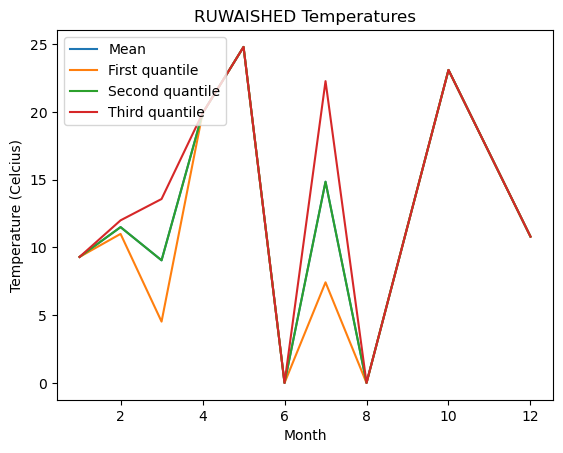

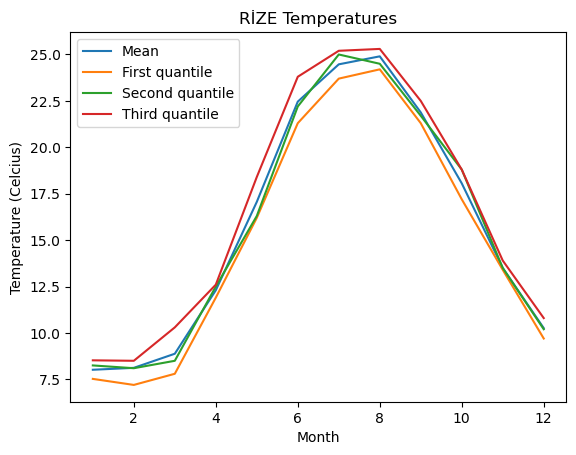

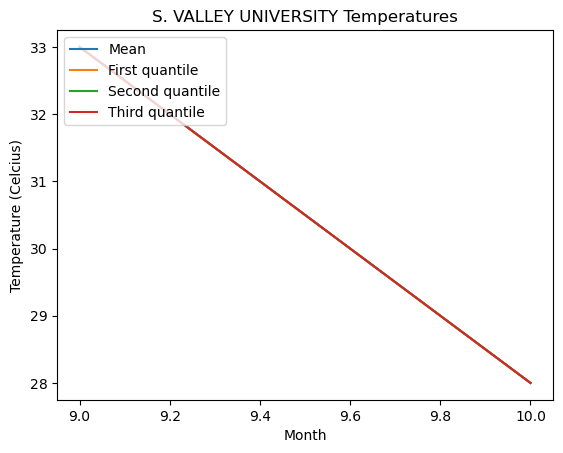

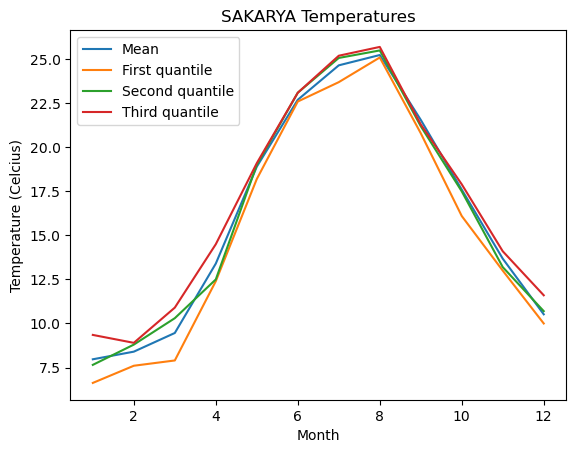

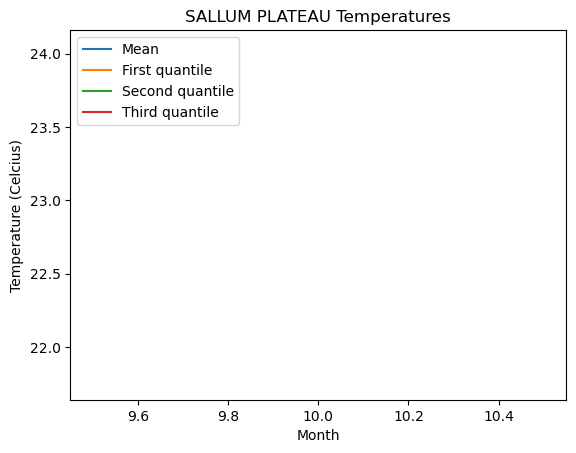

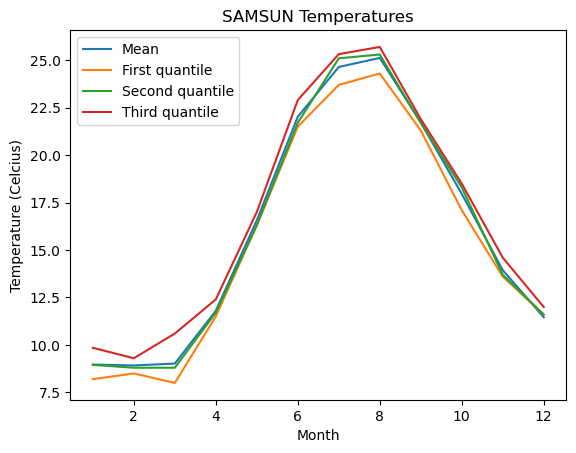

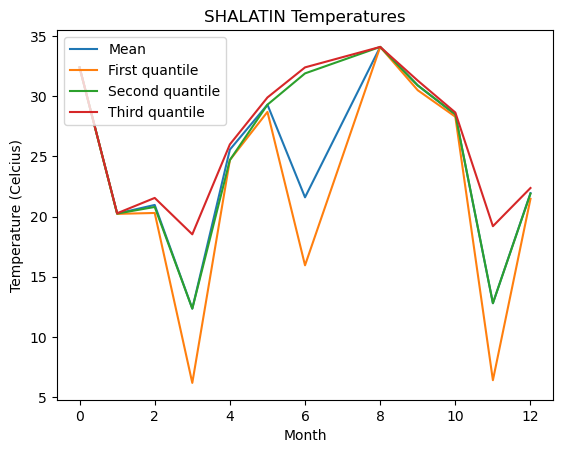

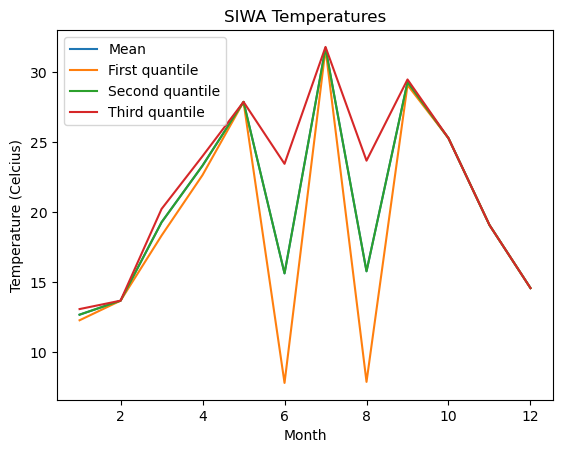

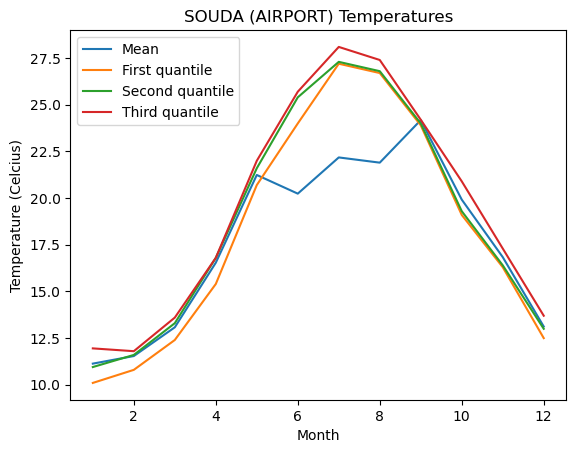

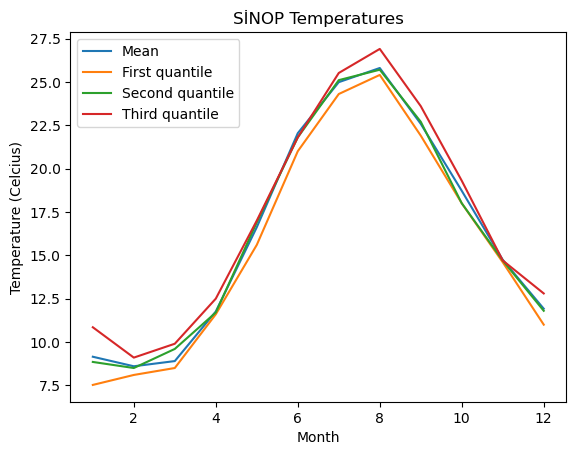

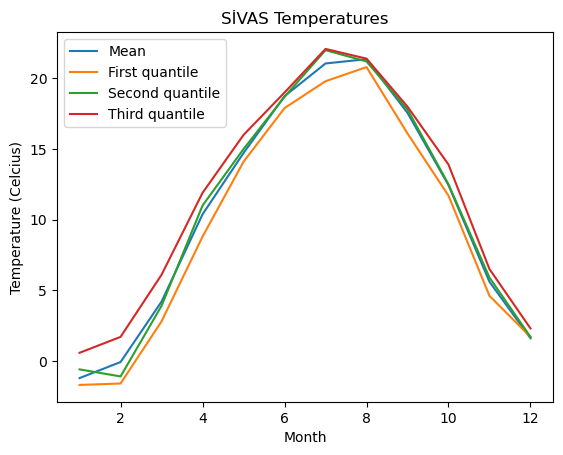

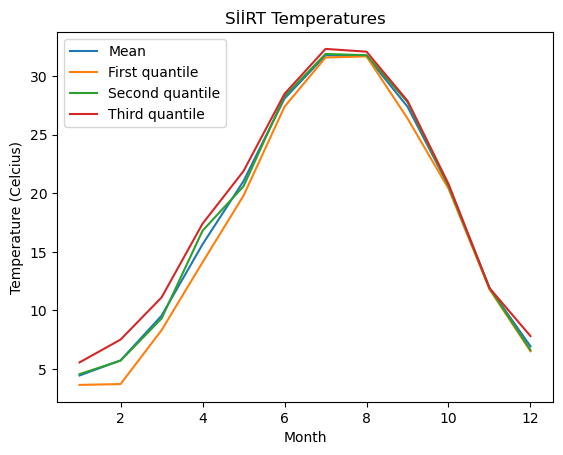

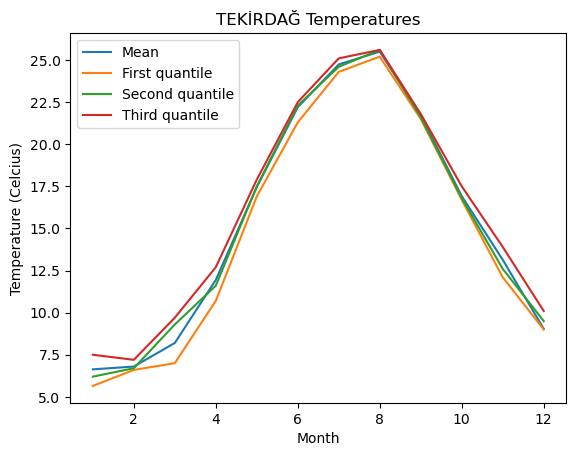

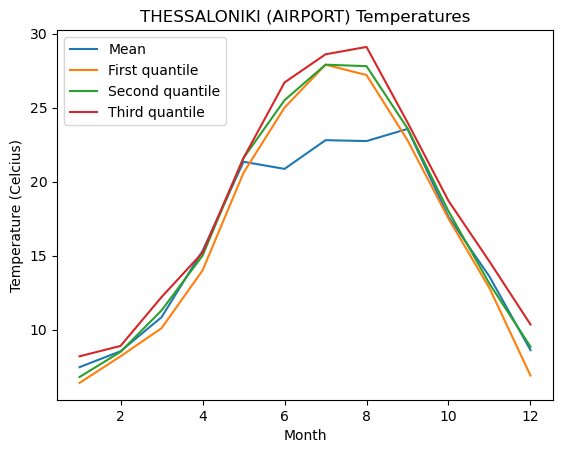

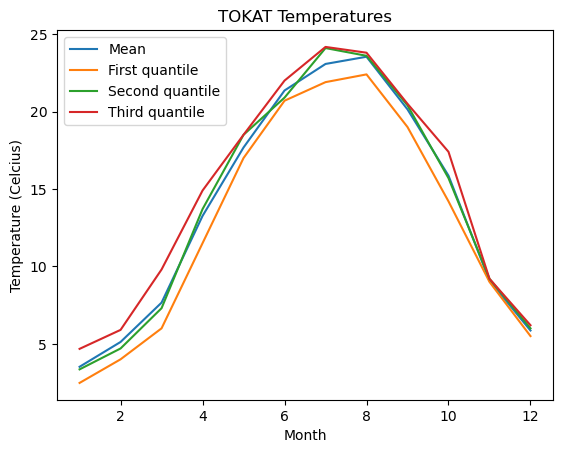

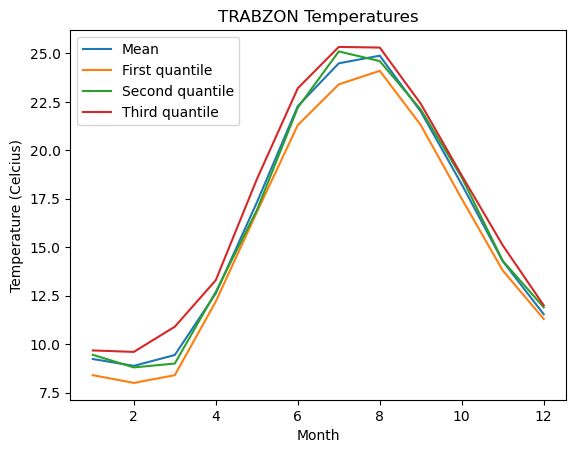

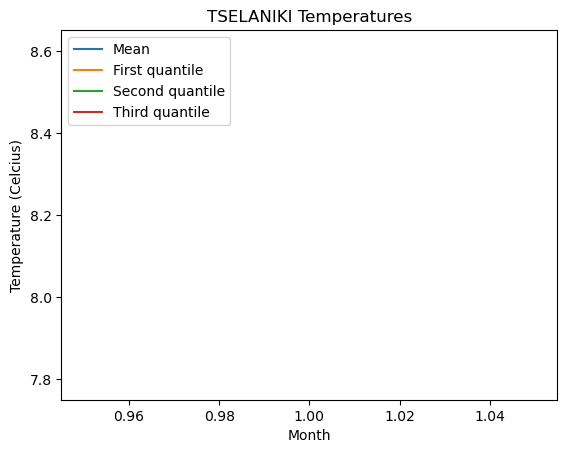

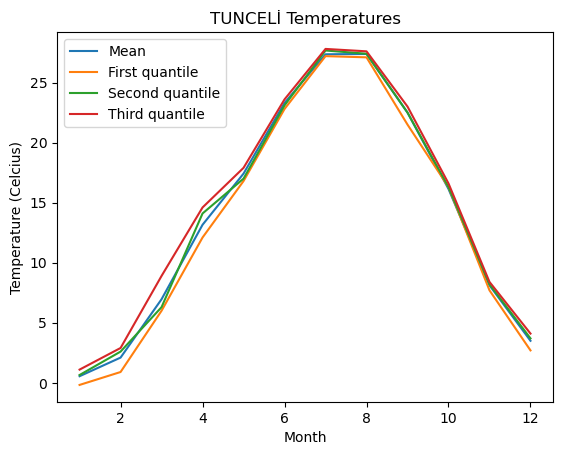

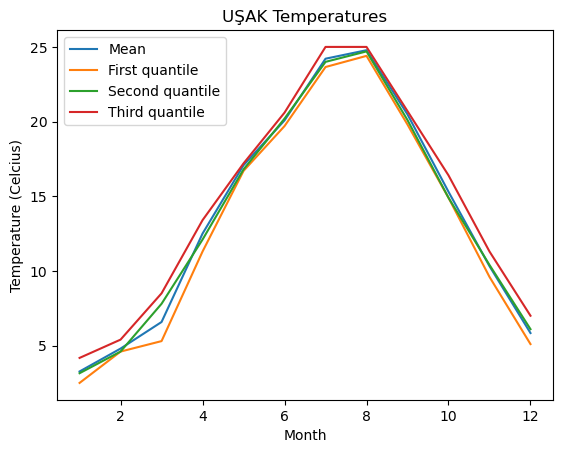

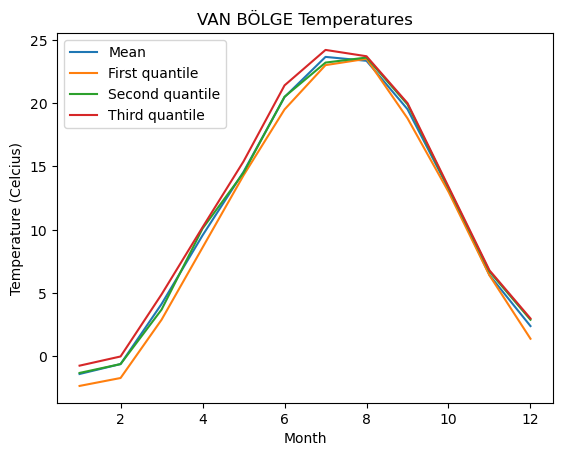

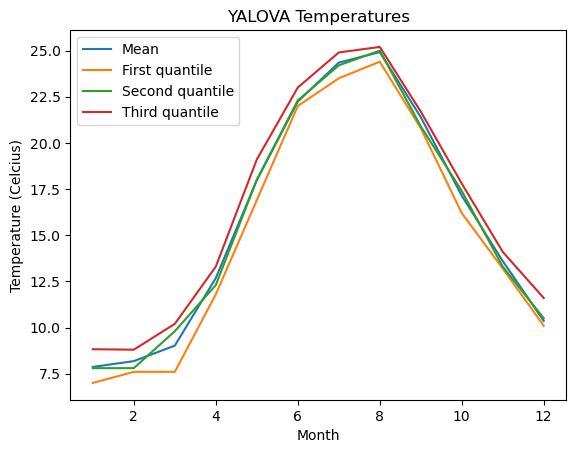

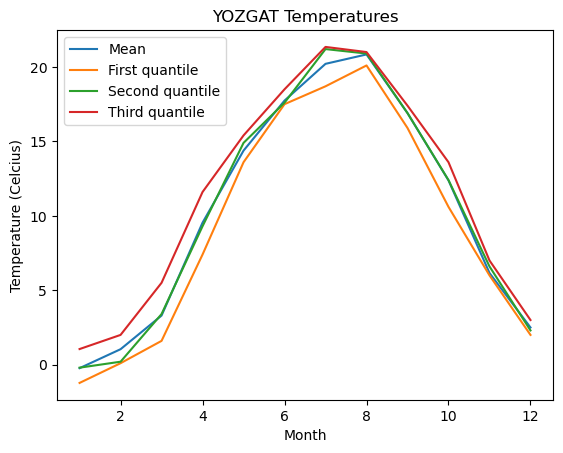

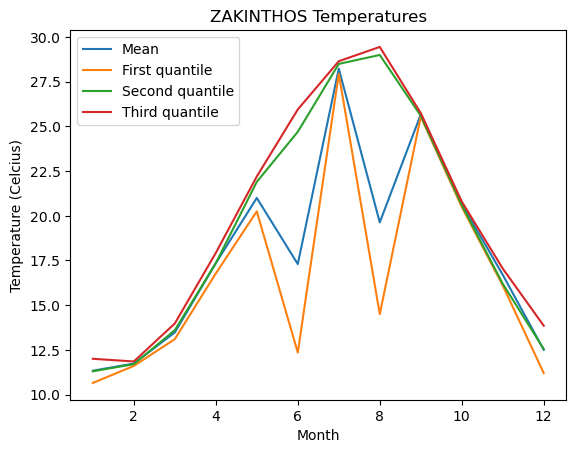

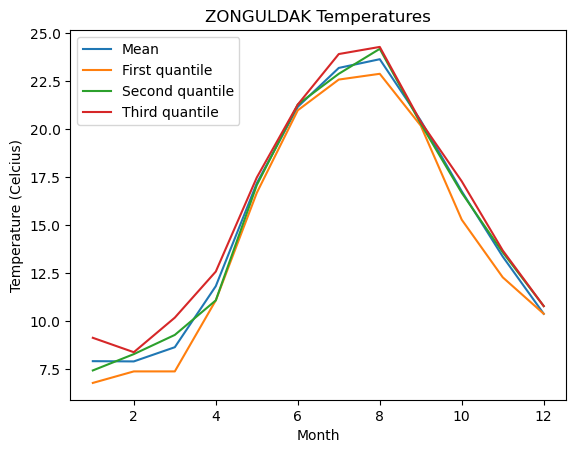

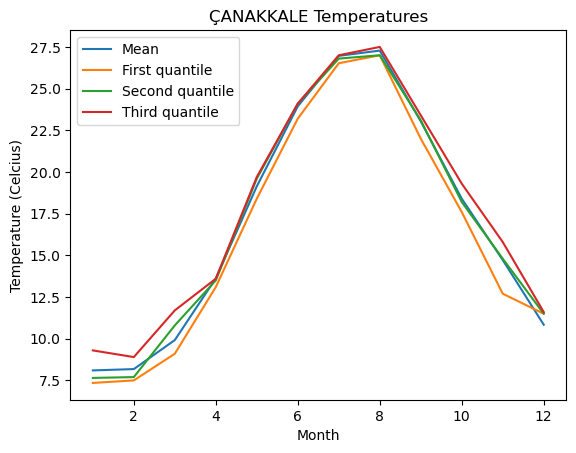

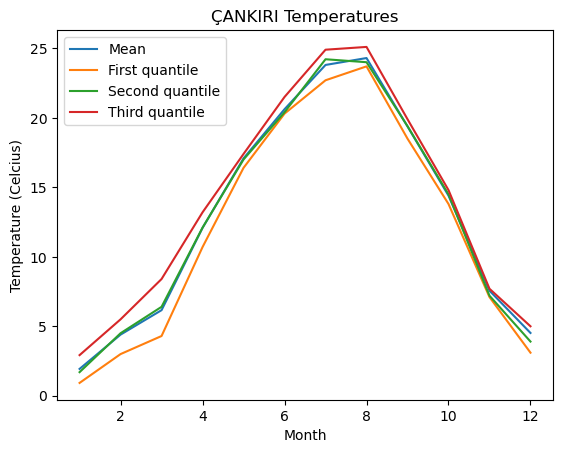

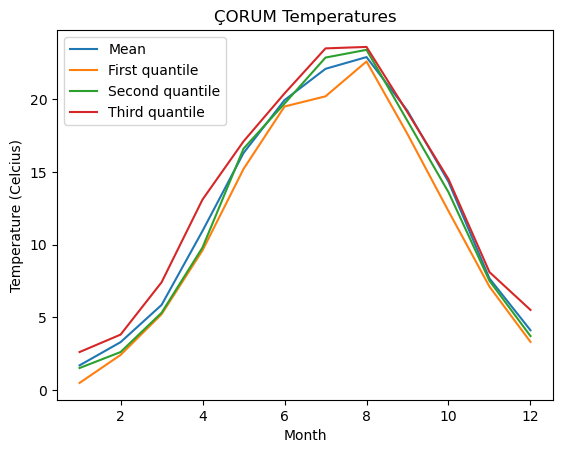

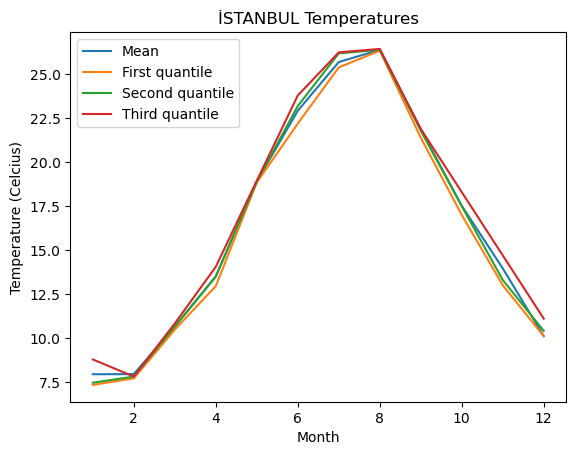

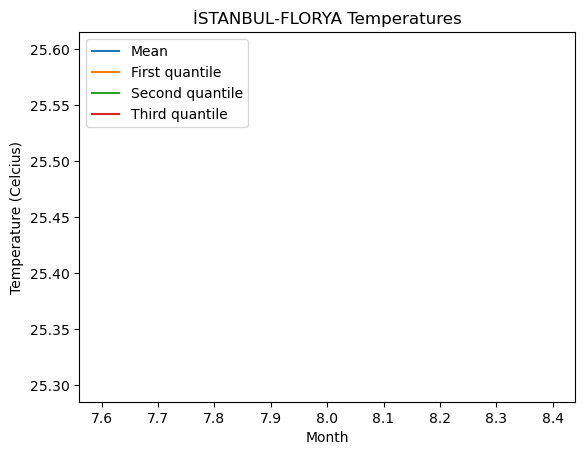

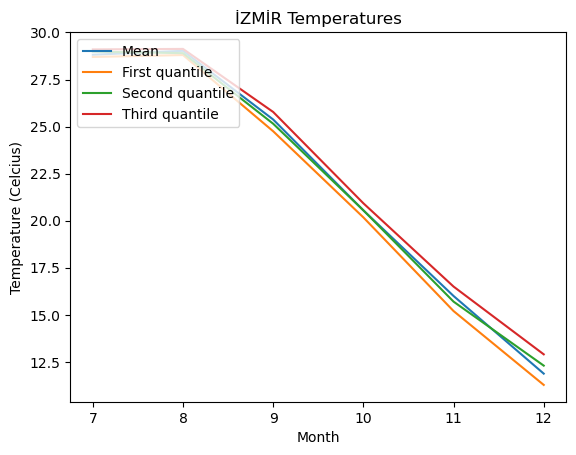

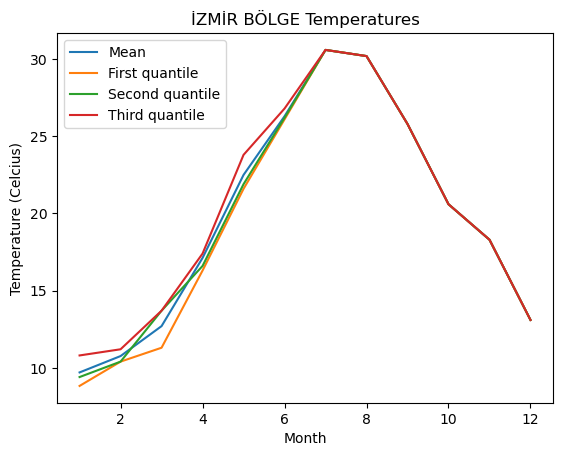

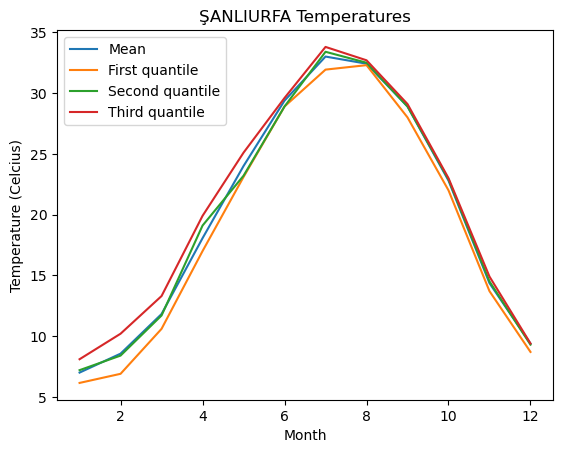

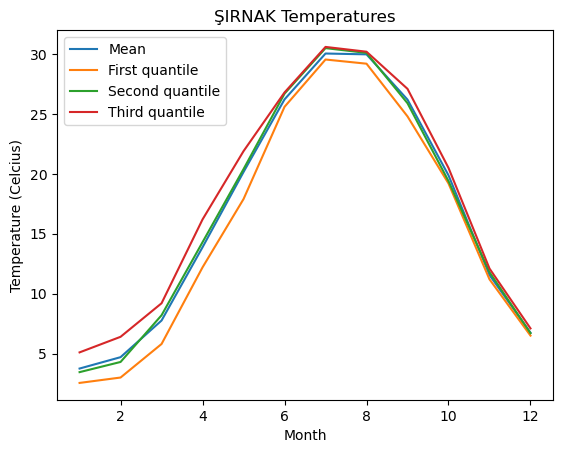

In [62]:
# Import pyplot from matplot library
import matplotlib.pyplot as plt

# Generate temperature plot charts for stations
for st in data_stations_list:
    plt.figure()
    plt.xlabel('Month')
    # naming the y axis
    plt.ylabel('Temperature (Celcius)')
    title = st + " " + "Temperatures"
    plt.title(title)
    plt.plot(temp_mean[st], label="Mean")
    plt.plot(temp_quantile_first[st], label="First quantile")
    plt.plot(temp_quantile_second[st], label="Second quantile")
    plt.plot(temp_quantile_third[st], label="Third quantile")
    plt.legend(loc="upper left")

# Print flow charts for each station
plt.show()


We close the plot library to free allocated memory. 

In [61]:
plt.close()